# Wildflower observation EDA 
## Questions
<br>1. What is the diversity of each park?
<br>2. When does each species bloom?
<br>3.. Are there any obvious relationships between blooming and climate variables?


# Guide <a id='top'></a>
## 1. Import necessary libraries
## 2. Import data [Link](#import)
 - [complete phenology dataset]('') has data only for dates with observations
 - [climate_daylength dataset]('') has climate data for all dates

## 3. Categorize species and filter for plant type [Link](#categorize)
 - 3a. [Categorize flowering species found in the park](#categorize)
 - 3b. [Filter for plant type](#filter)

## 4. Diversity and common species in each park [Link](#diversity)
 - 4a. [Table of parks, diversity, and most commonly observed species](#diversity_parks)
 - 4b. [Table of observations of herbaceous wildflower species by month](#table_month)
 - 4c. [Barcharts of the number of species in bloom each month by park](#barchart_month)
 
## 5. Filter for seasonality (optional) and minimum observations: Modeling dataset [Link](#seasonality)
 - 5a. [Filter for season](#seasonality)
 - 5b. [Filter for minimum number of  species observations (model dataset)](#min_obsv)
 

## 6. Manually check bloom status [Link](#bloom_status)
 - 6a. import any labeled data and map status onto phenology dataset
 - 6b. export unlabeled rows and manually label images
 - 6c. import newly labeled data and map status onto phenology dataset
 
## 7. Tables of pre-bloom, in-bud, in-bloom, and senesced [Link](#status_tables)
 - 7a. import data and drop observations of dead plants and ambiguous observations
 - 7b. construct count by month tables for each bloom status

## 8. Observations by month [Link](#by_month)
 - 8a. [regional: number of species in-bloom each month](#regional_spp)
 - 8b. [by park: number of species in-bloom each month](#park_spp_month)
 - 8c. [single species obesrvations by month](#single_spp_month)

## 9. Observations by water year week [Link](#by_week)
 - 9a. [table of observation counts by wateryear-week](#week_obs_counts)
 - 9b. [table of species observations by wateryear-week, park, and wateryear](#table_park_week_obs)

## 10. Bloom duration, first bloom, peak bloom, and last bloom weeks [Link](#bloom)
 - 10a. [table of species by park and year: bloom start, end, peak, and duration](#bloom_characteristics)
 - 10b. [create dataframe of first blooms](#first_blooms)
 - 10c. [plot first bloom observations by climate variable and wateryear week](#first_climate)

## 11. Single species frequency by wateryear week [Link](#single_species)
 - 11a. import data
 - 11b. [single species observed frequency by wateryear-week](#by_week)
 - 11c. [climate and frequency of observed blooms](#climate_frequency)
 ___________________________

_______________________________
# 1. Import the necessary libraries

In [1]:
# Import the libraries
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>[Link to top](#top) <a id='import'></a>
# 2. Import the data
<br>[link text](http://url)  insert links to code that generates data


In [2]:
#import phenology (climate+daylength+observations) data from GitHub:Floydworks
url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/phenology_dataset_2017_2022_df.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
phenology_data = pd.read_csv(io.StringIO(download.decode('utf-8')))
print('phenology_data:', phenology_data.shape)

#import climate_daylength data from GitHub:Floydworks
url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/climate_daylength_2017_2022.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
climate_daylength = pd.read_csv(io.StringIO(download.decode('utf-8')))
print('climate_daylength:', climate_daylength.shape)

phenology_data: (37901, 39)
climate_daylength: (14838, 54)


In [3]:
#assign new name for manipulation
df = phenology_data
#remove MtDiablo, reserve as test data
df = df[df['park']!= 'MtDiablo']

#look at phenology data
print('Parks in dataset: ',df['park'].unique())
print(df.shape)
print(df.columns)

Parks in dataset:  ['Sunol' 'PRidge' 'Briones' 'Tilden' 'AChabot' 'JDGrant' 'Garin']
(18859, 39)
Index(['id', 'park', 'plain_dates', 'Year', 'Month', 'Day', 'WY', 'wy_month',
       'WY_weeknum', 'genus_species', 'genus', 'species', 'latitude',
       'longitude', 'prec_daily', 'prec_cum_WY', 'MonSumPrec', 'WkSumPrec',
       'minTemp', 'maxTemp', 'hour_rise', 'minute_rise', 'hour_set',
       'minute_set', 'day_length', 'sum_prec_prior14', 'MaxTemp_prior14',
       'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14',
       'MaxDayLen_prior14', 'sum_prec_prior30', 'MaxTemp_prior30',
       'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30',
       'MaxDayLen_prior30', 'url', 'image_url'],
      dtype='object')


In [4]:
#select columns and reorder
df = df[['id', 'park','plain_dates', 'Year','Month', 'Day', 'WY', 'wy_month', 'WY_weeknum',
         'genus_species', 'genus','species', 'latitude', 'longitude','url', 'image_url','minTemp', 'maxTemp', 
         'day_length', 'prec_daily', 'prec_cum_WY', 'MonSumPrec', 'WkSumPrec', 'sum_prec_prior14', 'sum_prec_prior30',
         'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14', 'MaxDayLen_prior14',
         'MaxTemp_prior30', 'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 'MaxDayLen_prior30',
                      ]]
df.head(3)


,id,park,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,genus_species,...,MaxTemp_prior14,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30
0,104188607,Sunol,20220101,2022,1,1,2022,4,13,Baccharis pilularis,...,60.53,31.64,53.696429,39.939286,34634.0,61.52,30.65,55.103,40.436,35019.0
1,104188609,Sunol,20220101,2022,1,1,2022,4,13,Capsella bursa-pastoris,...,60.53,31.64,53.696429,39.939286,34634.0,61.52,30.65,55.103,40.436,35019.0
2,104667115,Sunol,20220108,2022,1,8,2022,4,13,Sambucus cerulea,...,63.05,29.12,55.297143,40.903571,34980.0,63.05,29.12,55.256,40.199,34980.0


<br>[Link to top](#top) 
# 3. Categorize species and filter for plant type: 
# herbaceous wildflower species dataset 
 - filters for herbaceous, annual wildflowers 
 - Drops shrubs, grasses, trees, and aquatic plants
 - Creates tables of number of species observed by month
 - Calculates percentage of observations of each species occuring in spring/summer months (Jan - July)

<a id='categorize'></a>
### 3a. Categorize flowering species found in the parks

In [5]:
wildflowers = ['Acaena pinnatifida', 'Achillea millefolium','Achyrachaena mollis','Acmispon americanus',
               'Acmispon brachycarpus','Acmispon glaber','Acmispon wrangelianus','Actaea rubra','Adelinia grande',
               'Ageratina adenophora','Agoseris grandiflora','Aira caryophyllea','Allium neapolitanum',
               'Allium triquetrum','Allium unifolium','Allium serra','Allium triquetrum''Allium unifolium',
               'Amaryllis belladonna','Amsinckia menziesii','Anaphalis margaritacea','Anemopsis californica',
               'Angelica californica','Anthemis cotula','Anthoxanthum occidentale','Anthriscus caucalis',
               'Aphyllon epigalium','Aphyllon franciscanum',
               'Aphyllon vallicola','Aquilegia formosa','Arctostaphylos crustacea','Arctostaphylos glauca',
               'Arctostaphylos patula','Arctotheca prostrata','Aristolochia californica','Arum italicum',
               'Arundo donax','Asarum caudatum','Asclepias californica','Asclepias fascicularis',
               'Asclepias speciosa','Astragalus gambelianus','Barbarea orthoceras','Bellardia trixago',
               'Bellis perennis','Blennosperma nanum','Blitum californicum','Brachypodium distachyon',
               'Brassica nigra','Brassica rapa','Brodiaea elegans','Calandrinia menziesii','Calendula arvensis',
               'Calochortus albus','Calochortus argillosus','Calochortus luteus','Calochortus venustus',
               'Calycadenia multiglandulosa','Calycadenia truncata','Calystegia collina','Calystegia purpurata',
               'Calystegia subacaulis','Capsella bursa-pastoris','Cardamine californica','Cardamine hirsuta',
               'Carduus pycnocephalus','Carduus tenuiflorus','Castanea dentata','Castilleja affinis',
               'Castilleja attenuata','Castilleja densiflora','Castilleja exserta','Castilleja foliolosa',
               'Castilleja rubicundula','Castilleja wightii','Caulanthus lasiophyllus','Centaurea calcitrapa',
               'Centaurea cyanus','Centaurea melitensis','Centaurea solstitialis','Centaurium tenuiflorum',
               'Centranthus ruber','Centromadia fitchii','Centromadia parryi','Cerastium fontanum',
               'Cerastium glomeratum','Chasmanthe bicolor','Chasmanthe floribunda','Chelidonium majus',
               'Chlorogalum pomeridianum','Cichorium intybus','Cirsium brevistylum','Cirsium occidentale',
               'Cirsium vulgare','Clarkia affinis','Clarkia amoena','Clarkia concinna','Clarkia gracilis',
               'Clarkia purpurea','Clarkia rubicunda','Clarkia unguiculata','Clinopodium douglasii',
               'Clinopodium menthifolium','Clinopodium vulgare','Clintonia andrewsiana','Collinsia heterophylla',
               'Collinsia sparsiflora','Conium maculatum','Convolvulus arvensis','Corallorhiza maculata',
               'Corethrogyne filaginifolia','Cotula coronopifolia','Crepis bursifolia','Crepis vesicaria',
               'Cymbalaria muralis','Cynara cardunculus','Datura wrightii','Daucus pusillus','Delairea odorata',
               'Delphinium californicum','Delphinium nuttallianum','Delphinium patens','Dendromecon rigida',
               'Dicentra formosa','Dichelostemma congestum','Digitalis purpurea','Dipsacus fullonum',
               'Dipsacus sativus','Dipterostemon capitatus','Dittrichia graveolens','Drymocallis glandulosa',
               'Dudleya cymosa','Epilobium brachycarpum','Epilobium canum','Epilobium ciliatum',
               'Epilobium densiflorum','Epipactis helleborine','Erigeron canadensis','Erigeron glaucus',
               'Erigeron philadelphicus','Eriodictyon californicum','Eriogonum fasciculatum','Eriogonum giganteum',
               'Eriogonum gracile','Eriogonum nudum','Eriophyllum confertiflorum','Erodium botrys',
               'Erodium cicutarium','Erodium moschatum','Erysimum capitatum','Erythranthe cardinalis',
               'Erythranthe guttata','Eschscholzia californica','Eurybia radulina','Foeniculum vulgare',
               'Freesia laxa','Fritillaria affinis','Fumaria capreolata','Geranium dissectum','Geranium molle',
               'Geranium purpureum','Geranium robertianum','Geranium yeoi','Gilia achilleifolia','Gilia capitata',
               'Gilia clivorum','Gilia tricolor','Glycyrrhiza lepidota','Grindelia camporum','Grindelia hirsutula',
               'Gutierrezia californica','Helenium puberulum','Helianthella castanea','Helichrysum luteoalbum',
               'Heliotropium curassavicum','Helminthotheca echioides','Hemizonia congesta','Heracleum maximum',
               'Hesperolinon californicum','Heterotheca grandiflora','Heterotheca oregona',
               'Heterotheca sessiliflora','Heuchera micrantha','Hirschfeldia incana','Hoita macrostachya',
               'Holocarpha heermannii','Holocarpha virgata','Horkelia californica','Hypericum calycinum',
               'Hypericum perforatum','Hypochaeris glabra','Hypochaeris radicata','Iris douglasiana',
               'Iris foetidissima','Iris macrosiphon','Kickxia elatine','Kickxia spuria','Lactuca ludoviciana',
               'Lactuca serriola','Lactuca virosa','Lagophylla ramosissima','Lamium amplexicaule',
               'Lamium purpureum','Lapsana communis','Lasthenia glaberrima','Lasthenia gracilis',
               'Lathyrus hirsutus','Lathyrus latifolius','Lathyrus odoratus','Lathyrus tingitanus',
               'Lathyrus vestitus','Layia hieracioides','Layia platyglossa','Leptosiphon androsaceus',
               'Leptosiphon bicolor','Leptosiphon parviflorus','Leucanthemum vulgare','Lilium pardalinum',
               'Limnanthes alba','Limnanthes douglasii','Linanthus californicus','Linum bienne',
               'Linum grandiflorum','Linum usitatissimum','Lithophragma affine','Lithophragma heterophyllum',
               'Lobularia maritima','Lomatium californicum','Lomatium dasycarpum','Lomatium macrocarpum',
               'Lomatium nudicaule','Lotus corniculatus','Ludwigia hexapetala','Ludwigia peploides',
               'Lunaria annua','Lupinus albifrons','Lupinus arboreus','Lupinus bicolor','Lupinus formosus',
               'Lupinus latifolius','Lupinus microcarpus','Lupinus nanus','Lupinus succulentus',
               'Lysichiton americanus','Lysimachia arvensis','Lysimachia latifolia','Lysimachia monelli',
               'Lythrum hyssopifolia','Madia elegans','Madia gracilis','Madia sativa','Maianthemum racemosum',
               'Maianthemum stellatum','Malva multiflora','Malva nicaeensis','Malva parviflora','Malva sylvestris',
               'Malvella leprosa','Matricaria discoidea','Matthiola incana','Melissa officinalis',
               'Mentha canadensis','Mentha pulegium','Mentzelia lindleyi','Micranthes californica',
               'Micropus californicus','Microsteris gracilis','Mimetanthe pilosa','Modiola caroliniana',
               'Monardella villosa','Monolopia major','Muilla maritima','Myosotis latifolia',
               'Narcissus pseudonarcissus','Narcissus tazetta','Nasturtium officinale','Navarretia pubescens',
               'Navarretia squarrosa','Nemophila heterophylla','Nemophila maculata','Nemophila menziesii',
               'Nemophila parviflora','Nicotiana acuminata','Nicotiana glauca','Oenanthe sarmentosa',
               'Oenothera speciosa','Osmorhiza berteroi','Oxalis corniculata','Oxalis incarnata','Oxalis oregana',
               'Oxalis pes-caprae','Oxalis pilosa','Papaver heterophyllum','Papaver rhoeas',
               'Pedicularis densiflora','Penstemon heterophyllus','Perideridia kelloggii','Persicaria amphibia',
               'Persicaria hydropiperoides','Persicaria maculosa','Phacelia californica','Phacelia distans',
               'Phacelia imbricata','Phacelia nemoralis','Phalaris aquatica','Phalaris paradoxa',
               'Pholistoma auritum','Pholistoma membranaceum','Phyla nodiflora','Physocarpus capitatus',
               'Phytolacca americana','Phytolacca heterotepala','Plagiobothrys nothofulvus','Plantago coronopus',
               'Plantago erecta','Plantago lanceolata','Plantago major','Plantago truncata','Platanthera elegans',
               'Platystemon californicus','Plectritis ciliosa','Plectritis macrocera','Pogogyne serpylloides',
               'Potentilla indica','Primula clevelandii','Primula hendersonii','Prosartes hookeri',
               'Prunella vulgaris','Pseudognaphalium californicum','Pseudognaphalium ramosissimum',
               'Psilocarphus tenellus','Rafinesquia californica','Ranunculus aquatilis','Ranunculus californicus',
               'Ranunculus hebecarpus','Ranunculus muricatus','Ranunculus occidentalis','Raphanus raphanistrum',
               'Raphanus sativus','Rhagadiolus stellatus','Rhinotropis cornuta','Romanzoffia californica',
               'Romulea rosea','Rorippa curvisiliqua','Rosa californica','Rosa gymnocarpa','Rosa rubiginosa',
               'Rumex conglomeratus','Rumex crispus','Rumex occidentalis','Rumex pulcher','Rumex salicifolius',
               'Sairocarpus vexillocalyculatus','Salvia columbariae','Salvia leucophylla','Salvia mellifera',
               'Sanguisorba minor','Sanicula bipinnata','Sanicula bipinnatifida','Sanicula laciniata',
               'Scoliopus bigelovii','Scrophularia californica','Scutellaria tuberosa','Sedum spathulifolium',
               'Senecio glomeratus','Senecio minimus','Senecio vulgaris','Sherardia arvensis',
               'Sidalcea diploscypha','Sidalcea malviflora','Silene gallica','Silene laciniata','Silybum marianum',
               'Sinapis arvensis','Sisymbrium officinale','Sisyrinchium bellum','Sisyrinchium californicum',
               'Sixalix atropurpurea','Solidago velutina','Soliva sessilis','Sonchus asper','Sonchus oleraceus',
               'Sparaxis tricolor','Spergula arvensis','Spergularia rubra','Stachys bullata','Stachys pycnantha',
               'Stachys rigida','Stellaria media','Symphyotrichum chilense','Tanacetum parthenium',
               'Taraxacum officinale','Taraxia ovata','Tauschia hartwegii','Tellima grandiflora',
               'Thalictrum fendleri','Thermopsis californica','Thysanocarpus curvipes','Torilis arvensis',
               'Toxicoscordion fremontii','Tradescantia fluminensis','Tragopogon porrifolius',
               'Trichostema lanceolatum','Trifolium albopurpureum','Trifolium angustifolium','Trifolium bifidum',
               'Trifolium campestre','Trifolium ciliolatum','Trifolium depauperatum','Trifolium dubium',
               'Trifolium fragiferum','Trifolium fucatum','Trifolium glomeratum','Trifolium gracilentum',
               'Trifolium hirtum','Trifolium incarnatum','Trifolium microcephalum','Trifolium microdon',
               'Trifolium obtusiflorum','Trifolium repens','Trifolium striatum','Trifolium tomentosum',
               'Trifolium variegatum','Trifolium willdenovii','Trillium albidum','Trillium chloropetalum',
               'Trillium ovatum','Triphysaria eriantha','Triphysaria pusilla','Triphysaria versicolor',
               'Triteleia hyacinthina','Triteleia laxa','Tropaeolum majus','Uropappus lindleyi',
               'Urospermum picroides','Verbascum thapsus','Verbena bonariensis','Verbena hastata',
               'Verbena lasiostachys','Veronica americana','Veronica anagallis-aquatica','Veronica catenata',
               'Veronica persica','Veronica serpyllifolia','Vicia americana','Vicia benghalensis','Vicia disperma',
               'Vicia gigantea','Vicia sativa','Vicia villosa','Vinca major','Viola glabella','Viola pedunculata',
               'Viola purpurea','Wyethia angustifolia','Wyethia glabra','Wyethia helenioides',
               'Zeltnera muehlenbergii']

# groups of plants to drop from dataset
small_flower = ['Alchemilla arvensis', 'Arceuthobium campylopodum', 'Bassia scoparia', 'Bowlesia incana', 'Claytonia parviflora',
                'Claytonia perfoliata','Claytonia sibirica','Crassula connata','Crassula tillaea', 
                'Croton setiger','Cuscuta californica','Datisca glomerata','Euphorbia lathyris',
                'Euphorbia oblongata','Euphorbia peplus','Fragaria chiloensis','Fragaria vesca','Galium aparine', 
                'Galium murale','Galium porrigens','Gnaphalium palustre','Hesperevax sparsiflora',
                'Hesperocnide tenella','Lepidium didymum','Lepidium nitidum', 'Lepidium strictum','Logfia gallica',
                'Marah fabacea','Medicago arabica','Medicago polymorpha','Marah oregana','Marrubium vulgare',
                'Parietaria judaica','Polygonum aviculare','Pterostegia drymarioides','Rumex acetosella', 
                'Rupertia physodes','Sanicula crassicaulis', 'Scandix pecten-veneris', 'Trifolium subterraneum',
                'Urtica dioica','Urtica gracilis','Urtica urens', ]

aquatic = ['Alisma triviale', 'Ceratophyllum demersum', 'Lemna minor','Myriophyllum aquaticum',
           'Zannichellia palustris',]

vine = ['Aristolochia californica', 'Hedera helix','Vitis californica',] #dutchmans pipe, english ivy, grapes 

parasitic = ['Phoradendron leucarpum','Phoradendron macrophyllum','Phoradendron villosum',]
    
shrubs = ['Acacia melanoxylon','Acacia verticillata', 'Acer macrophyllum','Acer negundo','Acer platanoides',
          'Aesculus californica','Alnus cordata','Alnus rhombifolia','Arbutus menziesii','Artemisia californica',
          'Artemisia douglasiana','Adenostoma fasciculatum', 'Ailanthus altissima','Aralia californica', 
          'Arctostaphylos','Baccharis glutinosa','Baccharis pilularis','Baccharis salicifolia','Berberis darwinii',
          'Berberis pinnata', 'Brickellia californica', 'Calycanthus occidentalis', 'Ceanothus oliganthus', 
          'Ceanothus thyrsiflorus', 'Cercocarpus betuloides', 'Clematis lasiantha', 'Cornus sericea',
          'Corylus cornuta','Cotoneaster coriaceus','Cotoneaster pannosus','Crataegus monogyna', 
          'Diplacus aurantiacus','Dirca occidentalis','Eucalyptus globulus','Euonymus occidentalis','Ficus carica',
          'Frangula californica','Garrya elliptica','Garrya flavescens','Genista monspessulana',
          'Holodiscus discolor','Heteromeles arbutifolia','Ilex aquifolium','Juglans hindsii','Ligustrum lucidum',
          'Ligustrum ovalifolium','Lonicera hispidula','Lonicera involucrata','Lonicera subspicata',
          'Melilotus albus','Melilotus indicus','Oemleria cerasiformis','Morella californica',
          'Notholithocarpus densiflorus','Olea europaea','Paraserianthes lophantha','Peritoma arborea',
          'Populus fremontii','Platanus racemosa','Prunus amygdalus',
          'Prunus cerasifera','Prunus ilicifolia','Prunus laurocerasus','Prunus lusitanica','Prunus virginiana',
          'Ptelea crenulata','Rhamnus crocea','Rhamnus ilicifolia','Rhododendron macrophyllum','Rhus aromatica',
          'Rhus integrifolia','Rhus ovata','Robinia pseudoacacia','Ribes californicum','Ribes divaricatum',
          'Ribes menziesii','Ribes sanguineum','Ribes speciosum','Rubus armeniacus','Rubus bifrons',
          'Rubus laciniatus','Rubus parviflorus','Rubus ursinus','Salix exigua','Salix laevigata','Salix lasiandra',
          'Salix lasiolepis','Sambucus cerulea','Sambucus racemosa','Schinus molle','Spartium junceum',
          'Symphoricarpos albus','Symphoricarpos mollis','Solanum americanum','Solanum nigrum',
          'Solanum umbelliferum','Solanum xanti','Tamarix ramosissima','Toxicodendron diversilobum',
          'Quercus agrifolia','Quercus chrysolepis','Quercus douglasii','Quercus garryana','Quercus kelloggii',
          'Quercus lobata','Quercus palmeri','Quercus wislizeni','Umbellularia californica','Vaccinium ovatum',
          'Xanthium spinosum','Xanthium strumarium',]
    
grass = ['Avena fatua','Aira caryophyllea', 'Anthoxanthum occidentale', 'Arundo donax','Brachypodium distachyon',
         'Briza maxima','Briza minor','Bromus carinatus','Bromus diandrus','Bromus hordeaceus','Bromus laevipes',
         'Bromus rubens','Bromus sterilis','Carex barbarae','Carex nudata', 'Cortaderia selloana',
         'Cynosurus echinatus','Cyperus alternifolius','Cyperus eragrostis','Cyperus erythrorhizos',
         'Dactylis glomerata','Danthonia californica','Deschampsia elongata','Elymus glaucus','Elymus multisetus',
         'Ehrharta erecta','Festuca bromoides','Holcus lanatus','Hordeum brachyantherum','Hordeum marinum',
         'Hordeum murinum','Juncus bufonius','Juncus effusus','Juncus patens','Juncus xiphioides',
         'Koeleria macrantha','Lamarckia aurea','Lolium perenne','Luzula comosa','Melica californica',
         'Melica torreyana','Nassella lepida','Nassella pulchra','Oloptum miliaceum','Phleum pratense',
         'Poa bulbosa','Poa secunda','Polypogon monspeliensis','Rytidosperma penicillatum',
         'Schoenoplectus californicus','Scirpus microcarpus','Sporobolus schoenoides','Taeniatherum caput-medusae',
         'Typha angustifolia','Typha latifolia',]

#list of species already labeled
labeled_spp = wildflowers + small_flower + aquatic + vine + parasitic +shrubs + grass

#complete list of speceis to drop
all_drop_spp = small_flower + aquatic + vine + parasitic + shrubs + grass
#all_drop_spp


**get list of wildflowers and species not yet labeled**

In [6]:
species_list_raw = sorted(df['genus_species'].unique())
species_list_updated = set(species_list_raw).difference(labeled_spp)

species_list_updated

set()

<a id='filter'></a>
### 3b. filter for plant type
 - drop shrubs, trees, vines, non-showy flowers

In [7]:
#see number of genera before dropping plant types
print('       all:', df.shape, len(np.unique(df['genus_species'])))

#drop species 
df = df[~df['genus_species'].isin(all_drop_spp)]

print('after drop:', df.shape, len(np.unique(df['genus_species'])))

       all: (18859, 35) 670
after drop: (12602, 35) 451


<br>[Link to top](#top) 
<a id='diversity'></a>
# 4. Diversity and common species in each park

<a id='diversity_parks'></a>
### 4a. Table of parks, diversity, and most commonly observed species

In [8]:
parks = list(df['park'].unique())

park_name = []
genera = []
species = []
common1 = []
common2 = []
common3 = []
common4 = []
common5 = []

for p in parks:
    df_temp = df[df['park']==p]
    park_name.append(p)
    genera.append(len(df_temp['genus'].unique()))
    species.append(len(df_temp['genus_species'].unique()))
    gen_sp_temp = df_temp.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')
    gen_sp_list = list(pd.Series(list(gen_sp_temp['genus_species'])).iloc[:5])
    common1.append(gen_sp_list[0])
    common2.append(gen_sp_list[1])
    common3.append(gen_sp_list[2])
    common4.append(gen_sp_list[3])
    common5.append(gen_sp_list[4])
    
#initialize dataframe and add table columns
parks_spp_table = pd.DataFrame({'Park': pd.Series(dtype='str')})
parks_spp_table['Park'] = park_name
parks_spp_table['Genera'] = genera
parks_spp_table['Species'] = species
parks_spp_table['Common_1'] = common1
parks_spp_table['Common_2'] = common2
parks_spp_table['Common_3'] = common3
parks_spp_table['Common_4'] = common4
parks_spp_table['Common_5'] = common5
parks_spp_table

,Park,Genera,Species,Common_1,Common_2,Common_3,Common_4,Common_5
0,Sunol,138,203,Castilleja exserta,Dipterostemon capitatus,Triteleia laxa,Viola pedunculata,Sisyrinchium bellum
1,PRidge,83,103,Blennosperma nanum,Calandrinia menziesii,Adelinia grande,Calochortus albus,Sisyrinchium bellum
2,Briones,147,228,Calandrinia menziesii,Eschscholzia californica,Castilleja exserta,Vicia villosa,Sisyrinchium bellum
3,Tilden,177,261,Lathyrus latifolius,Trillium chloropetalum,Sisyrinchium bellum,Heracleum maximum,Cirsium vulgare
4,AChabot,151,213,Taraxia ovata,Calochortus albus,Sisyrinchium bellum,Trillium chloropetalum,Dipsacus sativus
5,JDGrant,127,176,Sisyrinchium bellum,Eschscholzia californica,Viola pedunculata,Dipsacus sativus,Castilleja exserta
6,Garin,91,104,Eschscholzia californica,Aquilegia formosa,Raphanus sativus,Hemizonia congesta,Cardamine californica


<a id='table_month'></a>
### 4b. Table of observations of herbaceous wildflower species by month
 - obsY = number of observations in the entire time period
 - obsS = number of observations in spring/summer season (Jan - July)
 - obsP = proportion of observations occuring in spring/summer season

In [9]:
#Table of observation frequency for each species by month
sp_mo_tab = pd.get_dummies(df.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#rename columns as month names
sp_mo_tab.columns = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#wreset index to species_genus and reorder by water year months
tab_mo_wy = sp_mo_tab.reset_index().sort_values(by = 'Apr', ascending = False)
tab_mo_wy = tab_mo_wy[['genus_species','Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

#print(tab_mo_wy)

#count the months where plant does not appear
tab_mo_wy['mo_tab_mo_wy'] = tab_mo_wy.isin([0]).sum(axis=1)

#engineer  variables the get seasonality
tab_mo_wy['obsY'] = tab_mo_wy.iloc[:,1:13].sum(axis=1) #number of observations in all months all years
tab_mo_wy['obsS'] = tab_mo_wy.iloc[:,4:11].sum(axis=1) #number of observations in Jan-July all years
tab_mo_wy['obsP'] = tab_mo_wy['obsS']/tab_mo_wy['obsY'] #proportion of observations in Jan-July all years


In [10]:
####### FULL YEAR wildflower dataset
flowers_names = list(tab_mo_wy['genus_species'])
print('There are', (len(flowers_names)), 'herbaceous wildflower species')
tab_mo_wy.sort_values(by = 'genus_species')

There are 451 herbaceous wildflower species


,genus_species,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,mo_tab_mo_wy,obsY,obsS,obsP
0,Acaena pinnatifida,0,0,0,0,3,1,8,4,0,0,0,0,8,16,16,1.000000
1,Achillea millefolium,1,3,3,5,18,13,57,64,6,5,1,1,0,177,168,0.949153
2,Achyrachaena mollis,0,0,0,0,1,0,53,47,1,0,0,0,8,102,102,1.000000
3,Acmispon americanus,3,0,0,0,0,0,0,1,5,3,7,5,6,24,9,0.375000
4,Acmispon brachycarpus,0,0,0,0,0,0,0,0,1,0,0,0,11,1,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Viola purpurea,0,0,0,0,0,0,3,0,0,0,0,0,11,3,3,1.000000
447,Wyethia angustifolia,0,0,0,0,1,1,35,44,5,0,0,0,7,86,86,1.000000
448,Wyethia glabra,0,0,0,0,0,2,8,3,0,0,0,0,9,13,13,1.000000
449,Wyethia helenioides,0,0,0,1,2,17,27,6,0,0,0,0,7,53,53,1.000000


<a id='barchart_month'></a>
### 4c. Barcharts of the number of species in bloom each month by park

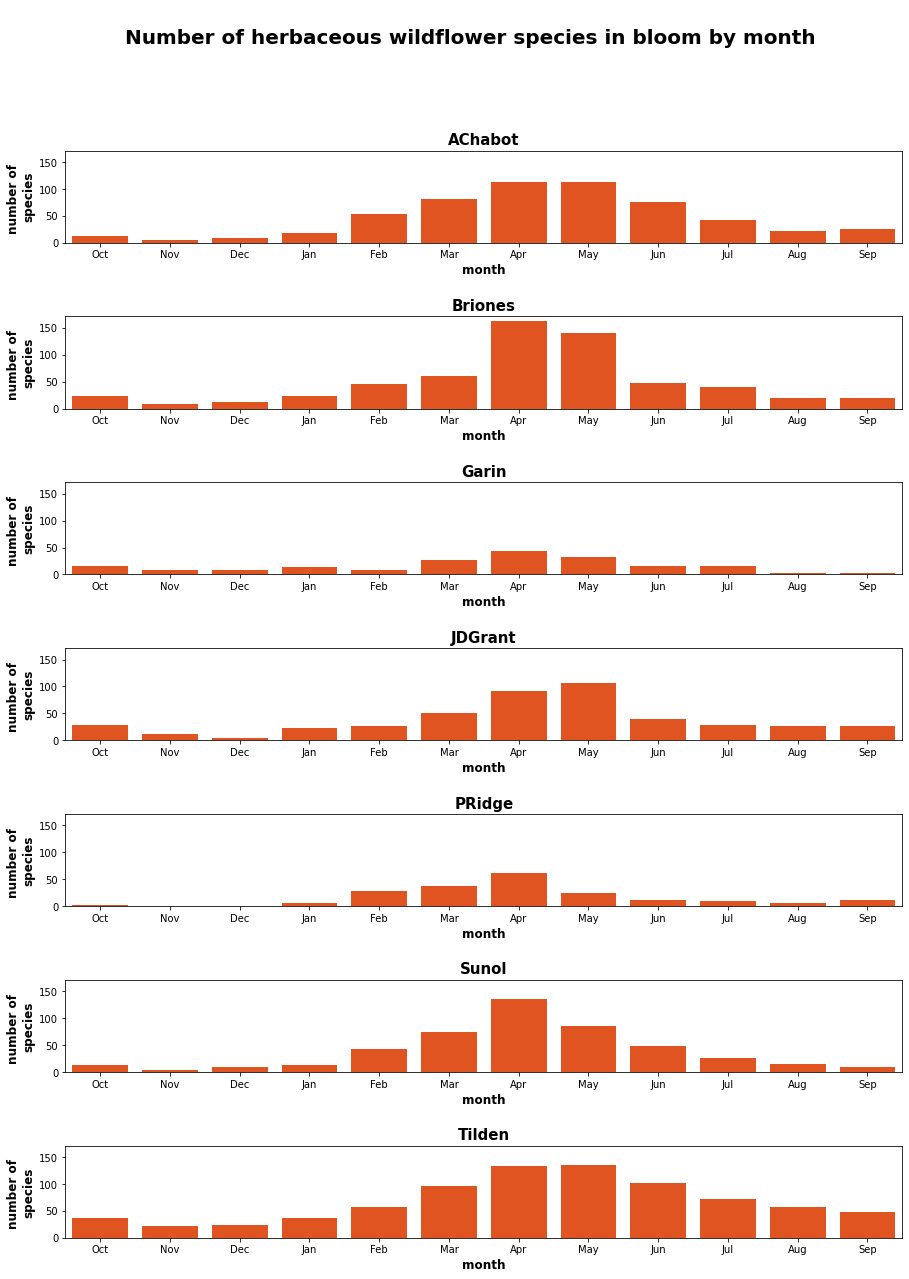

In [11]:

parks = list(df['park'].unique())
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
park_name = []
month_abbr = []
num_species = []

for p in parks:
    df_park = df[df['park']== p]
    #get just bloom-bloom observations
    df_bloom_park = df_park
    #print(str(p), ': ', df_bloom_park.shape)

    #Table of observation frequency for each species by month
    sp_mo_tab_bloom_park = pd.get_dummies(df_bloom_park.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

    #wreset index to species_genus and reorder by water year months
    tab_mo_wy_bloom_park = sp_mo_tab_bloom_park.reset_index().sort_values(by = 'genus_species', ascending = True)
    
    tab_mo = tab_mo_wy_bloom_park.drop(columns=['genus_species'])
    #print(tab_mo.head(3))
    df_cols = (list(tab_mo.columns))
    need = list(set(cols) - set(df_cols))
    #print(need)
    
    if len(need)>0:
        for n in need:
            tab_mo[n] = 0
    
    tab_mo = tab_mo.rename({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, axis=1)
    tab_mo = tab_mo[['Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]
    
    for column_name in tab_mo.columns:
            
        column = tab_mo[column_name]
        # Get the count of non-Zeros values in column
        count_of_non_zeros = (column != 0).sum()
        num_species.append(count_of_non_zeros)
        month_abbr.append(str(column_name))
        park_name.append(str(p))
 
frame = { 'park': park_name, 'month': month_abbr, 'species': num_species }
df_spp_month = pd.DataFrame(frame)
df_spp_month = df_spp_month.drop_duplicates()
#print(df_spp_month)

#single park, single variable, each week by water year
parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
ax_cols1 = range(len(parks))

fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nNumber of herbaceous wildflower species in bloom by month', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.barplot(ax=axes[a], data = df_spp_month[df_spp_month['park']== p], x = "month", y="species", color='orangered')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("month", fontsize = 12, weight='bold')
    axes[a].set_ylabel("number of \nspecies", fontsize = 12, weight='bold')

<br>[Link to top](#top) 
# 5. Filter for seasonality (optional) and minimum number of observations
# Modeling dataset: 


<a id='seasonality'></a>
### 5a. filter dataframe for seasonality (optional)

In [12]:
######## SPRING/SUMMER blooming dataset ############
#only keep species with at least 85% of observations falling between January and July
tab_spring_flowers = tab_mo_wy[tab_mo_wy['obsP']>.85].sort_values(by = 'genus_species')

#list of species to include and filter df
spring_flowers_names = list(tab_spring_flowers['genus_species'])
print('There are', (len(spring_flowers_names)), 'spring/summer, seasonal species')

#tab_spring_flowers.head(33)

#filter df for spring flowers
#df = df[df['genus_species'].isin(spring_flowers_names)]

#print(df['park'].unique())
#print(df.shape)
#df.head(3)

There are 353 spring/summer, seasonal species


<a id='min_obsv'></a>
### 5b. filter for minimum number of  species observations (model dataset)

In [13]:
#get observation counts for each species
counts_sp = df.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')

#Get species with a minimum number of observations
sp30 = counts_sp[counts_sp['count']>30]
sp50 = counts_sp[counts_sp['count']>50]
sp100 = counts_sp[counts_sp['count']>100]

#create list of species names to filter by
species30 = list(sp30['genus_species'])
species50 = list(sp50['genus_species'])
species100 = list(sp100['genus_species'])
print('You have',len(species30), 'species with greater than 30 observations')
print('You have',len(species50), 'species with greater than 50 observations')
print('You have',len(species100), 'species with greater than 100 observations')
#print(species100)

#drop species with fewer than n observations
df = df[df['genus_species'].isin(species100)]
df.shape

You have 112 species with greater than 30 observations
You have 72 species with greater than 50 observations
You have 35 species with greater than 100 observations


(6000, 35)

In [14]:
#get observation counts for each species
gen_sp = df.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')
print(gen_sp.head(10))

              genus_species  count
0       Sisyrinchium bellum    393
1  Eschscholzia californica    364
2        Castilleja exserta    302
3   Dipterostemon capitatus    252
4    Trillium chloropetalum    243
5     Calandrinia menziesii    223
6            Triteleia laxa    223
7  Chlorogalum pomeridianum    200
8           Adelinia grande    191
9             Vicia villosa    190


In [15]:
df.columns

Index(['id', 'park', 'plain_dates', 'Year', 'Month', 'Day', 'WY', 'wy_month',
       'WY_weeknum', 'genus_species', 'genus', 'species', 'latitude',
       'longitude', 'url', 'image_url', 'minTemp', 'maxTemp', 'day_length',
       'prec_daily', 'prec_cum_WY', 'MonSumPrec', 'WkSumPrec',
       'sum_prec_prior14', 'sum_prec_prior30', 'MaxTemp_prior14',
       'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14',
       'MaxDayLen_prior14', 'MaxTemp_prior30', 'MinTemp_prior30',
       'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 'MaxDayLen_prior30'],
      dtype='object')

<br>[Link to top](#top) <a id='bloom_status'></a>
# 6. Manually check bloom status with URLs and map onto dataset
**only includes species with at least n observations**

### 6a. import any labeled data and map status onto phenology dataset

In [16]:
#import labeled observation data from GitHub:Floydworks
url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/df_status_labeled.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
df_labeled = pd.read_csv(io.StringIO(download.decode('utf-8')))
print('df_labeled:', df_labeled.shape)


df_labeled: (6000, 37)


### 6b. export unlabeled rows and manually label images
 - pre-bloom = 0
 - in-bud = 2
 - in-bloom = 1
 - senesced/fruiting = 3
 - dead = 5
 - ambiguous/drop = 6

In [17]:
#list of observation id that are labeled
df_labeled_ids = list(df_labeled['id'].unique())
print('labeled data: ',len(df_labeled_ids))

#list of all ids in the current dataframe
df_ids = list(df['id'].unique())
print('all data: ',len(df_ids))

#just the rows of unlabeled observations
df_unlabeled = df[~df['id'].isin(df_labeled_ids)]

print('unlabeled data: ',len(df_unlabeled))
if len(df_labeled) == len(df_ids):
    print('\nNo new data to label!')

labeled data:  6000
all data:  6000
unlabeled data:  0

No new data to label!


**export unlabeled observations for labeleing**

In [18]:
#df_url_export = df_unlabeled[['id', 'park', 'plain_dates', 'genus_species', 'url', 'image_url']]

#export csv for manually checking observation URLs for bloom or not in bloom
#df_url_export.to_csv('YOUR FILE PATH')



### (optional) 6c. import newly labeled data and map status onto phenology dataset
######## ONLY USE IF THERE IS NEW DATA ########

**import newly labeled data: df_status_unlabeled -> df_status new, after labeling**

In [19]:
#import newly-labeled observation data from GitHub:Floydworks
#url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/df_status_new.csv')
#download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
#df_status_new = pd.read_csv(io.StringIO(download.decode('utf-8')))

#get newly labeled data from local drive
#df_status_new = pd.read_csv('YOUR FILE PATH')

#print('df_status_new:', df_status_new.shape)

In [20]:
#create dictionary of main observation ids and status, old dataset
#id_status_dict_main = dict(zip(df_labeled['id'], df_labeled['status']))
#print(len(id_status_dict_main))

#create dictionary of new observation ids and status, the update
#id_status_dict_new = dict(zip(df_status_new['id'], df_status_new['status']))
#print(len(id_status_dict_new))

#merge the two dictionaries to update id_status_dict_main
#id_status_dict_main.update(id_status_dict_new)

#print(len(id_status_dict_main))

In [21]:
#map new labels onto phenology dataset
#df['status'] = df['id'].map(id_status_dict_main)
#print(df.shape)

#check for remaining missing labels
#print('There are: ',df['status'].isna().sum(), '  missing status labels in the dataset')
#df.head()

In [22]:
### export phenology dataset with labeled status
#df.to_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Public_Final/df_status_labeled.csv')
#df.to_csv('YOUR LOCAL FILE PATH')

In [23]:
### export phenology dataset with labeled status
#df.to_csv('/Users/sandidge/Desktop/Python_Projects/Springboard_coursework/Capstone2_Wildflowers/Public_Final/df_phenology_status_2017_2022.csv')
#flowers_data.to_csv('YOUR LOCAL FILE PATH')

<br>[Link to top](#top)<a id='status_tables'></a>
# 7. Tables of pre-bloom, in-bud, in-bloom, and senesced


### 7a. import data and drop observations of dead plants and ambiguous observations

In [24]:
#import labeled observation data from GitHub:Floydworks
url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/df_phenology_status_2017_2022.csv')
download = requests.get(url).content
# Read the downloaded content and turn it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
print('df:', df_labeled.shape)



df: (6000, 37)


In [25]:
#check for missing values
#df.isna().sum()

In [26]:
status_keep = [0, 1, 2, 3]
df = df[df['status'].isin(status_keep)]
print(df.shape)

(5925, 37)


### 7b. construct count by month tables for each bloom status

### all status: each species with separate row for each status level

In [27]:
#Table of observation frequency for each species by month
sp_mo_tab_stat = pd.get_dummies(df.set_index(['genus_species','status'])['Month']).reset_index().groupby(['status','genus_species']).sum().astype(int)

#rename columns as month names
sp_mo_tab_stat.columns = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#wreset index to species_genus and reorder by water year months
tab_mo_wy_stat = sp_mo_tab_stat.reset_index().sort_values(by = ['genus_species', 'status'], ascending = True)
tab_mo_wy_stat = tab_mo_wy_stat[['genus_species','Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

#count the months where plant does not appear
tab_mo_wy_stat['mo_tab_mo_wy'] = tab_mo_wy_stat.isin([0]).sum(axis=1)

#tab_mo_wy_stat.head(10)

### pre-bloom: only status = 0

In [28]:
#get just pre-bloom observations
df_pre = df[df['status']==0]
print(df_pre.shape)

#Table of observation frequency for each species by month
sp_mo_tab_pre = pd.get_dummies(df_pre.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#rename columns as month names
sp_mo_tab_pre.columns = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#wreset index to species_genus and reorder by water year months
tab_mo_wy_pre = sp_mo_tab_pre.reset_index().sort_values(by = 'genus_species', ascending = True)
tab_mo_wy_pre = tab_mo_wy_pre[['genus_species','Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

#count the months where plant does not appear
tab_mo_wy_pre['mo_tab_mo_wy'] = tab_mo_wy_pre.isin([0]).sum(axis=1)

#tab_mo_wy_pre.head(33)

(424, 37)


### in-bud: : only status = 2

In [29]:
#get just bud-bloom observations
df_bud = df[df['status']==2]
print(df_bud.shape)

#Table of observation frequency for each species by month
sp_mo_tab_bud = pd.get_dummies(df_bud.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#rename columns as month names
sp_mo_tab_bud.columns = ['Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Sep']

#wreset index to species_genus and reorder by water year months
tab_mo_wy_bud = sp_mo_tab_bud.reset_index().sort_values(by = 'genus_species', ascending = True)
tab_mo_wy_bud = tab_mo_wy_bud[['genus_species','Feb', 'Mar', 'Apr', 'May', 'Jun']]

#count the months where plant does not appear
tab_mo_wy_bud['mo_tab_mo_wy'] = tab_mo_wy_bud.isin([0]).sum(axis=1)

#tab_mo_wy_bud.head(33)

(159, 37)


### in-bloom: : only status = 1

In [30]:
#get just bloom-bloom observations
df_bloom = df[df['status']==1]
print(df_bloom.shape)

#Table of observation frequency for each species by month
sp_mo_tab_bloom = pd.get_dummies(df_bloom.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#rename columns as month names
sp_mo_tab_bloom.columns = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#wreset index to species_genus and reorder by water year months
tab_mo_wy_bloom = sp_mo_tab_bloom.reset_index().sort_values(by = 'genus_species', ascending = True)
tab_mo_wy_bloom = tab_mo_wy_bloom[['genus_species','Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

#count the months where plant does not appear
tab_mo_wy_bloom['mo_tab_mo_wy'] = tab_mo_wy_bloom.isin([0]).sum(axis=1)

#tab_mo_wy_bloom.head(33)

(5194, 37)


### in-fruit (senesced): only status = 3

In [31]:
#get just fruit-fruit observations
df_fruit = df[df['status']==3]
print(df_fruit.shape)

#Table of observation frequency for each species by month
sp_mo_tab_fruit = pd.get_dummies(df_fruit.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#rename columns as month names
sp_mo_tab_fruit.columns = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#reset index to species_genus and reorder by water year months
tab_mo_wy_fruit = sp_mo_tab_fruit.reset_index().sort_values(by = 'genus_species', ascending = True)
tab_mo_wy_fruit = tab_mo_wy_fruit[['genus_species','Oct', 'Nov', 'Dec', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

#count the months where plant does not appear
tab_mo_wy_fruit['mo_tab_mo_wy'] = tab_mo_wy_fruit.isin([0]).sum(axis=1)

#tab_mo_wy_fruit.head(33)

(148, 37)


<br>[Link to top](#top) <a id='by_month'></a>
# 8. Observations by month


<a id='regional_spp'></a>
### 8a. regional: number of species in-bloom each month

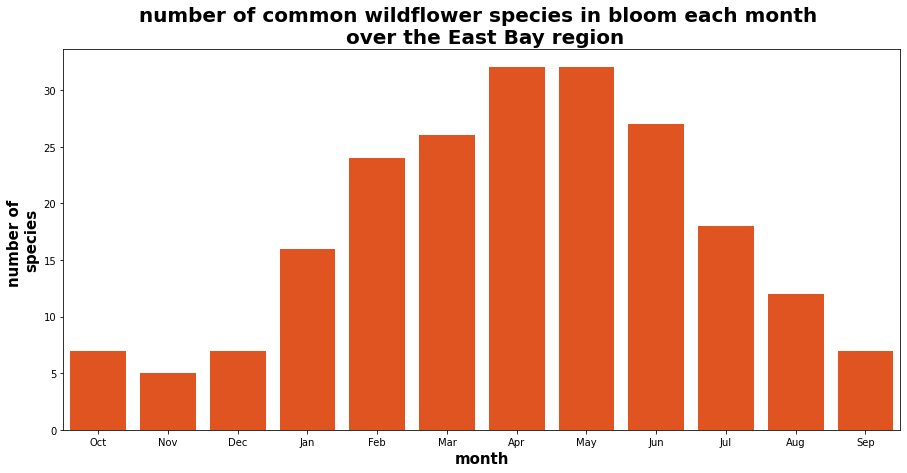

In [32]:

cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
month_abbr = []
num_species = []


#get just bloom-bloom observations
df_bloom_park = df[df['status']==1]
#print(str(p), ': ', df_bloom_park.shape)

#Table of observation frequency for each species by month
sp_mo_tab_bloom_park = pd.get_dummies(df_bloom_park.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

#wreset index to species_genus and reorder by water year months
tab_mo_wy_bloom_park = sp_mo_tab_bloom_park.reset_index().sort_values(by = 'genus_species', ascending = True)
    
tab_mo = tab_mo_wy_bloom_park.drop(columns=['genus_species'])

tab_mo = tab_mo.rename({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, axis=1)
tab_mo = tab_mo[['Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]

for column_name in tab_mo.columns:
            
    column = tab_mo[column_name]
    # Get the count of non-Zeros values in column
    count_of_non_zeros = (column != 0).sum()
    num_species.append(count_of_non_zeros)
    month_abbr.append(str(column_name))
 
frame = {'month': month_abbr, 'species': num_species }
df_spp_month = pd.DataFrame(frame)
df_spp_month = df_spp_month.drop_duplicates()
#print(df_spp_month)

plt.figure(figsize=(15,7))

sns.barplot(data = df_spp_month, x = 'month', y = 'species', color='orangered')
plt.title('number of common wildflower species in bloom each month \n over the East Bay region', fontsize=20, weight='bold')
plt.xlabel("month", fontsize = 15, weight='bold')
plt.ylabel("number of \nspecies", fontsize = 15, weight='bold')

plt.show()

<a id='park_spp_month'></a>
### 8b. by park: number of species in-bloom each month

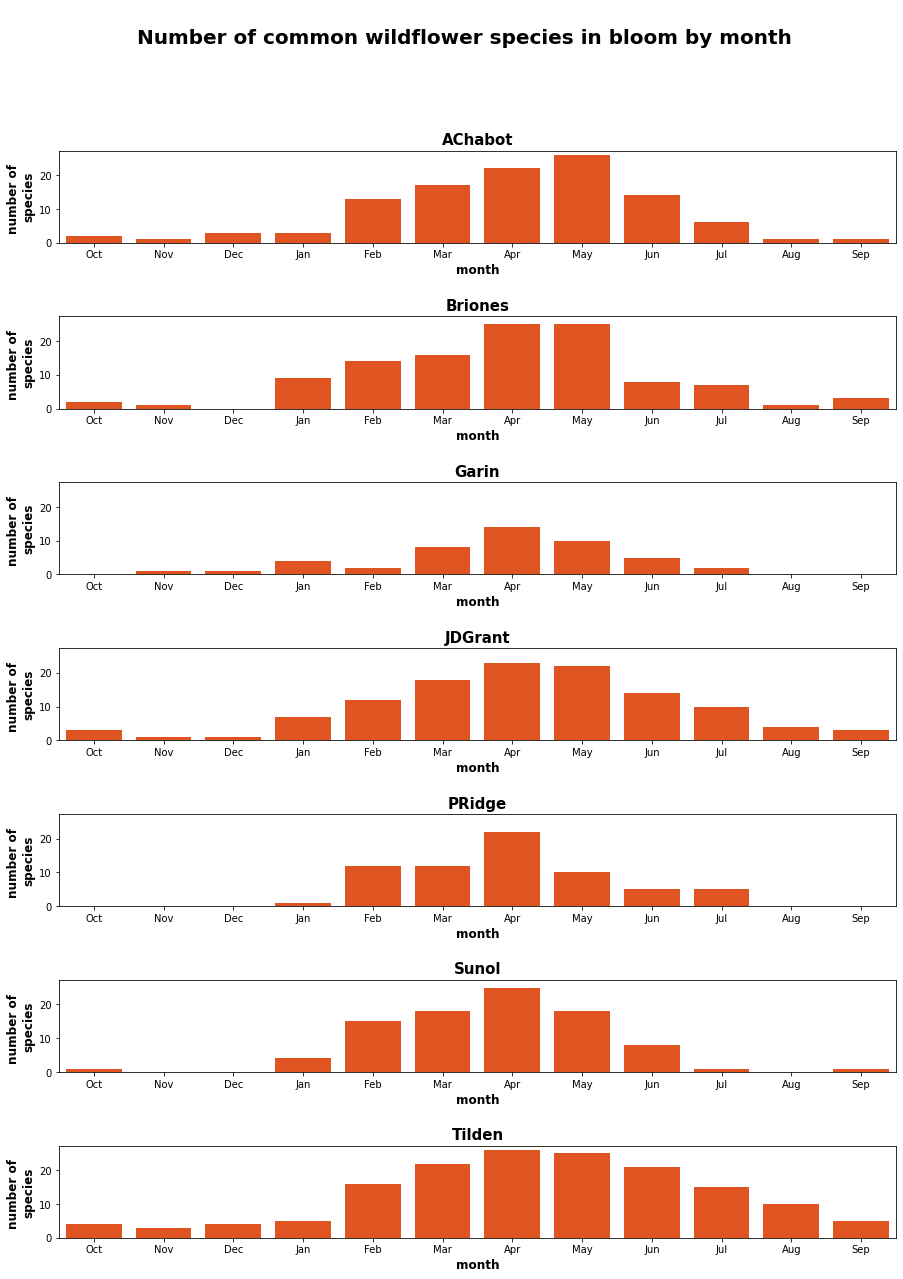

In [33]:
parks = list(df['park'].unique())
cols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
park_name = []
month_abbr = []
num_species = []

for p in parks:
    df_park = df[df['park']== p]
    #get just bloom-bloom observations
    df_bloom_park = df_park[df_park['status']==1]
    #print(str(p), ': ', df_bloom_park.shape)

    #Table of observation frequency for each species by month
    sp_mo_tab_bloom_park = pd.get_dummies(df_bloom_park.set_index('genus_species')['Month']).reset_index().groupby('genus_species').sum().astype(int)

    #wreset index to species_genus and reorder by water year months
    tab_mo_wy_bloom_park = sp_mo_tab_bloom_park.reset_index().sort_values(by = 'genus_species', ascending = True)
    
    tab_mo = tab_mo_wy_bloom_park.drop(columns=['genus_species'])
    #print(tab_mo.head(3))
    df_cols = (list(tab_mo.columns))
    need = list(set(cols) - set(df_cols))
    #print(need)
    
    if len(need)>0:
        for n in need:
            tab_mo[n] = 0
    
    tab_mo = tab_mo.rename({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, axis=1)
    tab_mo = tab_mo[['Oct', 'Nov', 'Dec', 'Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']]
    
    for column_name in tab_mo.columns:
            
        column = tab_mo[column_name]
        # Get the count of non-Zeros values in column
        count_of_non_zeros = (column != 0).sum()
        num_species.append(count_of_non_zeros)
        month_abbr.append(str(column_name))
        park_name.append(str(p))
 
frame = { 'park': park_name, 'month': month_abbr, 'species': num_species }
df_spp_month = pd.DataFrame(frame)
df_spp_month = df_spp_month.drop_duplicates()
#print(df_spp_month)

#single park, single variable, each week by water year
parks = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
ax_cols1 = range(len(parks))

fig, axes = plt.subplots(7, 1, figsize=(15, 20), sharey=True)
plt.subplots_adjust(hspace = 0.8)
fig.suptitle('\nNumber of common wildflower species in bloom by month', fontsize=20, weight='bold')

for p, a in zip(parks, ax_cols1):
    sns.barplot(ax=axes[a], data = df_spp_month[df_spp_month['park']== p], x = "month", y="species", color='orangered')
    axes[a].set_title(p, fontsize=15, weight='bold')
    axes[a].set_xlabel("month", fontsize = 12, weight='bold')
    axes[a].set_ylabel("number of \nspecies", fontsize = 12, weight='bold')
    

<a id='single_spp_month'></a>
### 8c. single species obesrvations by month

**example barplot Adelinia grande, observations by month over 5 years**

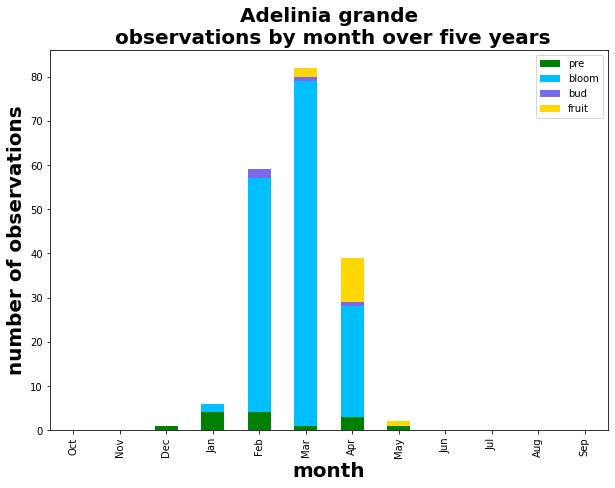

In [34]:
#creating dataframe
AG = tab_mo_wy_stat[tab_mo_wy_stat['genus_species']== 'Adelinia grande']
AG = AG[['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']]
AG
#format dataframe
bar_AG  = AG.T.reset_index()
bar_AG.columns = ['month','pre','bloom','bud','fruit']
bar_AG = bar_AG.set_index('month')
bar_AG = bar_AG[['pre', 'bloom', 'bud', 'fruit']]
bar_AG
# create stacked bar chart for monthly temperatures
bar_AG.plot(kind='bar', stacked=True, color=['green', 'deepskyblue', 'mediumslateblue', 'gold'], figsize = (10, 7))
plt.xlabel('month', fontsize=20, weight = 'bold')
plt.ylabel('number of observations', fontsize=20, weight = 'bold')
plt.title('Adelinia grande\n observations by month over five years', fontsize=20, weight = 'bold')

plt.show()

**barplot of in-bloom observations only**

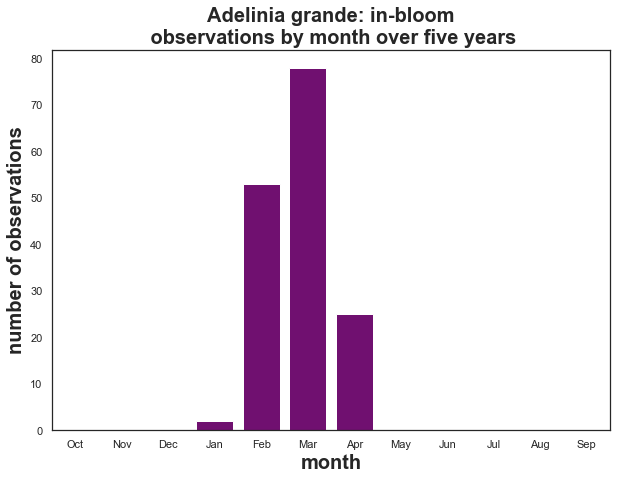

In [35]:
A_grande_bloom = tab_mo_wy_bloom[tab_mo_wy_bloom['genus_species']=='Adelinia grande']
y = A_grande_bloom[['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep']]
bar_A_grande_bloom = y.T.reset_index()
bar_A_grande_bloom.columns =['month', 'frequency']
#bar_A_grande

# Set the figure size and theme
plt.figure(figsize=(10, 7))
sns.set_theme(style='white')

sns.barplot(data=bar_A_grande_bloom, x='month', y='frequency', color='purple')
plt.xlabel('month', fontsize=20, weight = 'bold')
plt.ylabel('number of observations', fontsize=20, weight = 'bold')
plt.title('Adelinia grande: in-bloom\n observations by month over five years', fontsize=20, weight = 'bold')

plt.show()

<br>[Link to top](#top) <a id='by_week'></a>
# 9. Observations by water year week
<br>There are 48 weeks in a water year. Each water year month (calendar month) is divided into 4 "weeks"
<br>Week 1 = 8 days, week 2 = 7 days, week 3 = 9 days, week 4 = remaining days
<br>

<a id='week_obs_counts'></a>
### 9a. table of observation counts by wateryear-week

In [36]:
#number of observations by week
df_week_counts = df.groupby(['WY_weeknum'])['WY_weeknum'].count().reset_index(name='count')

df_week_counts.T.head(48)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
WY_weeknum,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
count,21,10,6,6,5,7,3,6,2,4,...,60,28,32,8,18,12,35,11,6,7


<a id='table_park_week_obs'></a>
### 9b. table of species observations by wateryear-week, park, and wateryear

In [37]:
#Get table for each park and water year

column_names =['genus_species', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', 'park', 'wy']

#initialize empty dataframe
tab_mo_wy = pd.DataFrame(columns = column_names)

#park = ['Briones', 'Sunol', 'Tilden']
park = ['AChabot', 'Briones', 'Garin', 'JDGrant', 'PRidge', 'Sunol', 'Tilden']
years = [2018, 2019, 2020, 2021, 2022]
ax_cols1 = range(len(years))

for p in park:
    for y in years:
        df_temp = df[(df['park']== p) & (df['WY']==y)]
        tab_mo_temp = pd.get_dummies(df_temp.set_index('genus_species')['WY_weeknum']).groupby('genus_species').sum().reset_index()
        tab_mo_temp['park'] = p
        tab_mo_temp['wy'] = y
        tab_mo_temp.columns = tab_mo_temp.columns.astype(str)
        tab_mo_wy = pd.concat([tab_mo_wy, tab_mo_temp], axis=0)
    
    
tab_mo_wy = tab_mo_wy.fillna(0)
#tab_mo_wy.head(30)

In [38]:
#set genus_species, park, and water year as index/row names, leaving only numerical data
print(tab_mo_wy['park'].unique())
tab_wk = tab_mo_wy.set_index(['genus_species', 'park','wy'])
#convert values to int64
tab_wk = tab_wk.astype('int64')

#look for missing weeks/columns and create columns of zero values
#print(tab_wk.columns)
#create zero-valued columns as needed
#tab_wk[5]=0

#tab_wk.head()

['AChabot' 'Briones' 'Garin' 'JDGrant' 'PRidge' 'Sunol' 'Tilden']


<br>[Link to top](#top) <a id='bloom'></a>
# 10. Bloom duration, first bloom, peak bloom, and last bloom weeks

<a id='bloom_characteristics'></a>
### 10a. table of species by park and year, observationd by week, start, end, peak, and duration

In [39]:
#get first, last bloom, each water year 

#table of non-zero values
mask_all = tab_wk > 0     

#Create abundance table with response variables: 
#first week in bloom, last week in bloom, peak bloom month, and bloom duration

#get response variables, first week with bloom and last week with bloom
response_start_end = tab_wk.assign(start=mask_all.idxmax(axis=1), end=mask_all.iloc[:,::-1].idxmax(axis=1))
#convert new variables to int64
response_start_end = response_start_end.astype('int64')
#response_start_end.head(3)

#add total observations, peak week, and duration
response_subset = response_start_end.drop(['start', 'end'],axis=1) #subset just the numerical observation columns
response_start_end['total'] = response_subset.sum(axis=1)          #sum observation frequency weekly values
response_start_end['peak'] = response_subset.idxmax(axis = 1)      #create column of max value (peak bloom week)
response_start_end['duration'] = (response_start_end['end'] - response_start_end['start']) +1  #add bloom duration
response_start_end = response_start_end.astype('int64')            #convert all to int64
#print(response_start_end.head(3))

#table observations by species, park, and year
response_wy_park = response_start_end.sort_values(by=['genus_species', 'wy', 'park'])
response_wy_park.head()



1  2  3  4  5  6  7  8  9  10  ...  44  45  \
genus_species        park    wy                                   ...           
Achillea millefolium AChabot 2018  0  0  0  0  0  0  0  0  0   0  ...   0   0   
                     Briones 2018  0  0  0  0  0  0  0  0  0   0  ...   0   0   
                     Sunol   2018  0  0  0  0  0  0  0  0  0   0  ...   0   0   
                     Tilden  2018  0  0  0  0  0  0  0  0  0   0  ...   0   0   
                     AChabot 2019  0  0  0  0  0  0  0  0  0   0  ...   0   0   

                                   46  47  48  start  end  total  peak  \
genus_species        park    wy                                          
Achillea millefolium AChabot 2018   0   0   0     28   28      2    28   
                     Briones 2018   0   0   0     17   30      4    17   
                     Sunol   2018   0   0   0     21   32      4    21   
                     Tilden  2018   0   0   0     25   35      4    25   
                     AChabot 2019   0   0   0     12   33      5    29   

                                   duration  
genus_species        park    wy              
Achillea millefolium AChabot 2018         1  
                     Briones 2018        14  
                     Sunol   2018        12  
                     Tilden  2018        11  
                     AChabot 2019        22  

[5 rows x 53 columns]

**table of wateryear weeks and count of times that week was the peak bloom time for any species**

In [40]:
#creat table of weeks and number of times that week is the peak for a species in each park/wateryear combo
df_week_counts = response_start_end.groupby(['peak'])['peak'].count().reset_index(name='count')
df_week_counts = df_week_counts.sort_values(by = 'count', ascending = False)
print('There are', len(response_start_end), 'species/park/water year rows')
#df_week_counts.head(48)

There are 834 species/park/water year rows


<a id='first_blooms'></a>
### 10b. create dataframe of first blooms
<br> first bloom in 7 parks, 5 years = maximum 35 observations per species

In [41]:
#data frame of first observations of season in each park and year

#initialize empty dataframe
firsts = pd.DataFrame(columns=['genus_species', 'id', 'park', 'date', 'plain_dates', 'Year', 'Month',
       'Day', 'WY', 'wy_month', 'WY_weeknum', 'genus', 'species', 'latitude',
       'longitude', 'url', 'image_url', 'minTemp', 'maxTemp', 'day_length',
       'prec_daily', 'prec_cum_WY', 'MonSumPrec', 'WkSumPrec',
       'sum_prec_prior14', 'sum_prec_prior30', 'MaxTemp_prior14',
       'MinTemp_prior14', 'AvgMaxTemp_prior14', 'AvgMinTemp_prior14',
       'MaxDayLen_prior14', 'MaxTemp_prior30', 'MinTemp_prior30',
       'AvgMaxTemp_prior30', 'AvgMinTemp_prior30', 'MaxDayLen_prior30'])

parks = list(df['park'].unique())
years = [2018, 2019, 2020, 2021, 2022]

for p in parks:
    for y in years:
        pdf = df[(df['park']==p)&(df['WY']==y)]
        fob = pdf.groupby('genus_species').nth(0) 
        fob = fob.reset_index()
        #print(str(p), str(y), len(fob), len(fob['genus_species'].unique()))    #validate by checking that lengths match
        firsts = pd.concat([firsts, fob])
 
firsts.head()
#firsts.to_csv('/Users/sandidge/Desktop/top_20_first_check.csv')

,genus_species,id,park,date,plain_dates,Year,Month,Day,WY,wy_month,...,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30,Unnamed: 0,status
0,Achillea millefolium,10096013,Sunol,NaN,20180304,2018,3,4,2018,6,...,56.454286,35.863571,41340.0,79.07,29.12,63.533,39.101,41340.0,820.0,0.0
1,Achyrachaena mollis,27728721,Sunol,NaN,20180211,2018,2,11,2018,5,...,72.422857,44.015000,38432.0,79.07,34.07,66.059,43.199,38432.0,790.0,1.0
2,Adelinia grande,9814624,Sunol,NaN,20180210,2018,2,10,2018,5,...,72.744286,44.272143,38302.0,79.07,34.07,65.960,43.433,38302.0,780.0,1.0
3,Bellardia trixago,11801592,Sunol,NaN,20180428,2018,4,28,2018,7,...,70.957143,47.467143,49097.0,84.47,39.47,71.033,47.645,49097.0,1103.0,1.0
4,Calandrinia menziesii,9939712,Sunol,NaN,20180219,2018,2,19,2018,5,...,67.190000,40.582143,39506.0,79.07,34.07,66.653,41.420,39506.0,803.0,1.0


<a id='first_climate'></a>
### 10c.  plot first bloom observations by climate variable and wateryear week

**temperature**

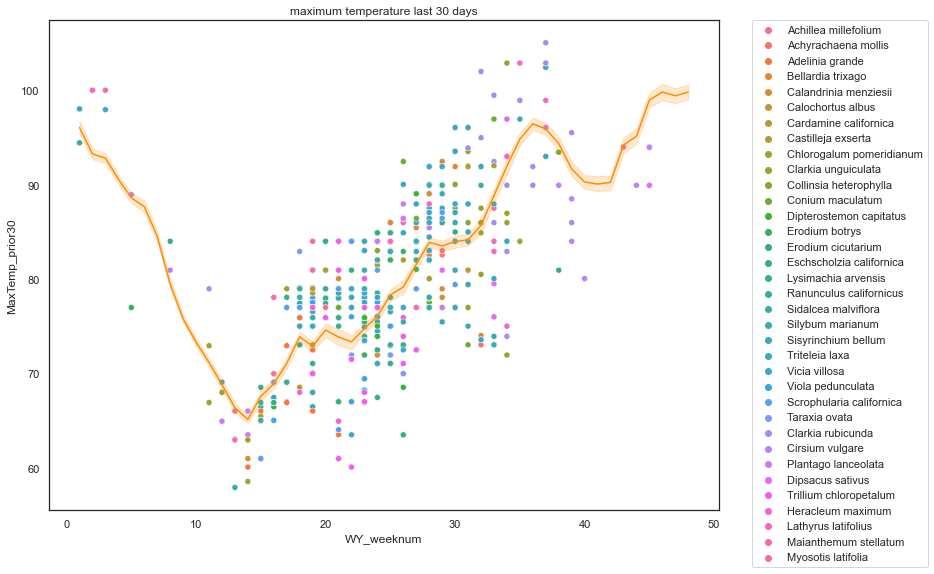

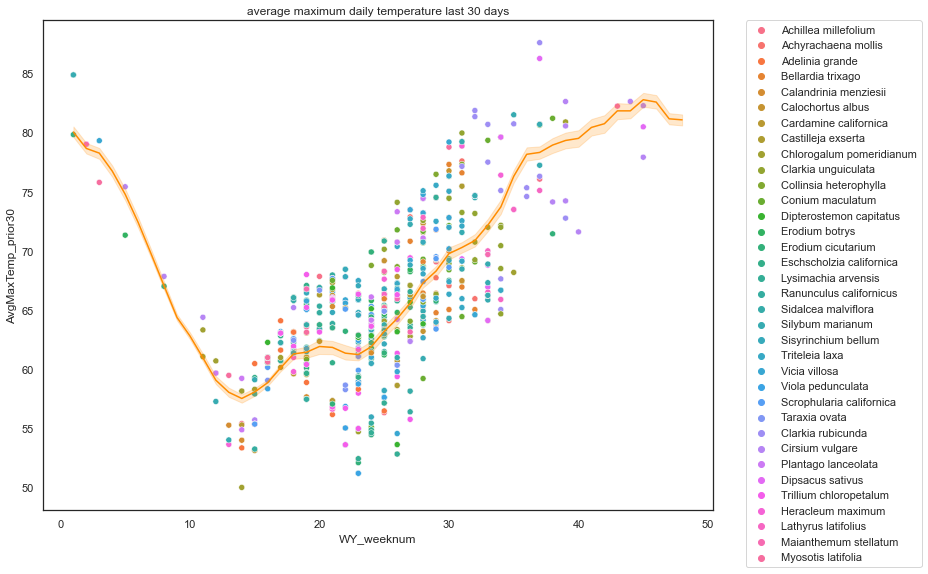

In [42]:
plt.figure(figsize = (12, 9))
sns.scatterplot(data=firsts, x="WY_weeknum", y="MaxTemp_prior30", hue='genus_species').set(
    title="maximum temperature last 30 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['MaxTemp_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#smooth with average max temp prior 30
plt.figure(figsize = (12,9))
sns.scatterplot(data=firsts, x="WY_weeknum", y="AvgMaxTemp_prior30", hue='genus_species').set(
    title="average maximum daily temperature last 30 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['AvgMaxTemp_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


<br>**precipitation**

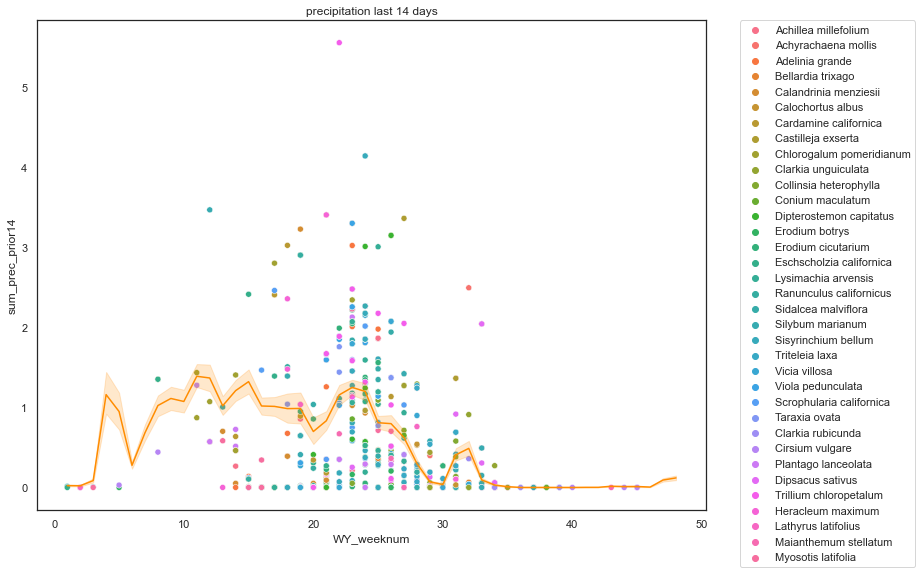

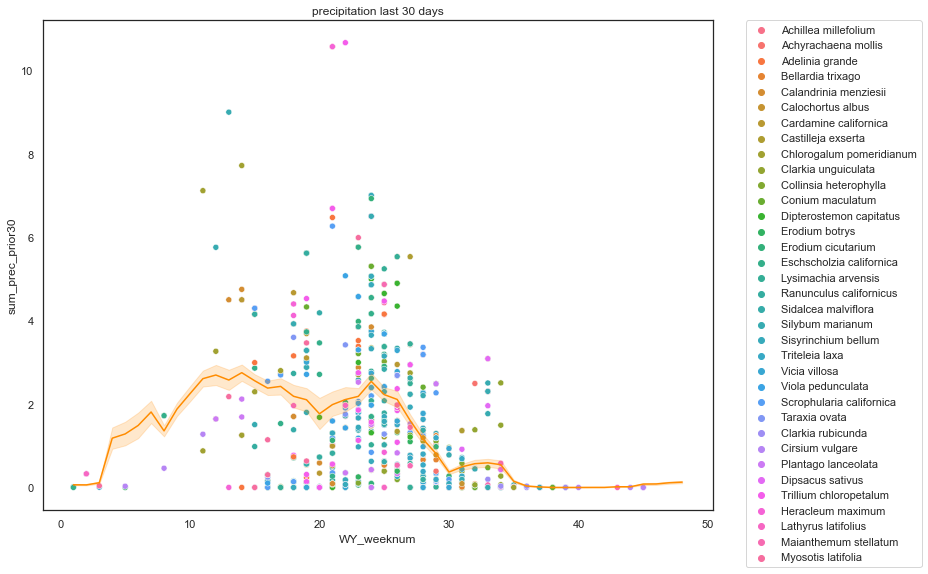

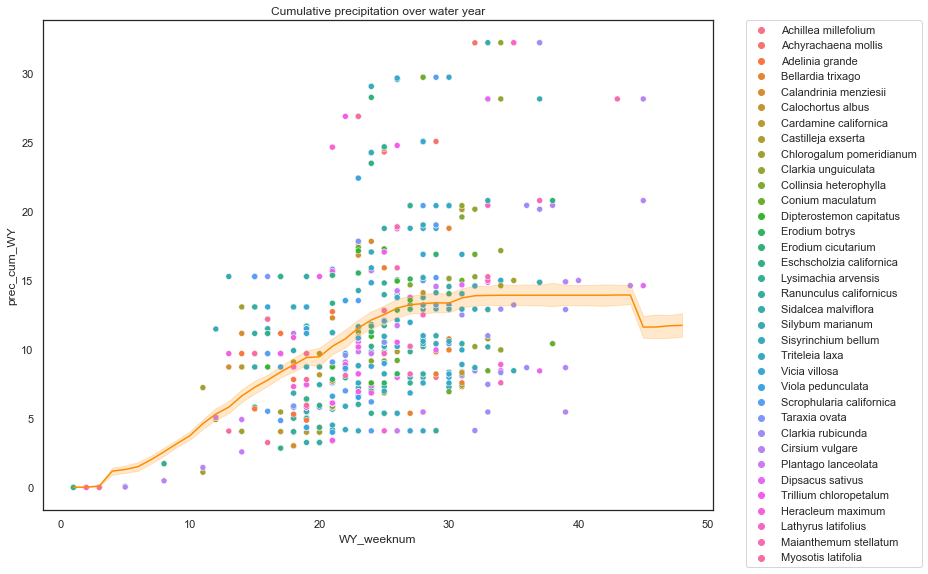

In [43]:
#prior 14 days
plt.figure(figsize = (12,9))
sns.scatterplot(data=firsts, x="WY_weeknum", y="sum_prec_prior14", hue='genus_species').set(
    title="precipitation last 14 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior14']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#prior 30 days
plt.figure(figsize = (12,9))
ax = sns.scatterplot(data=firsts, x="WY_weeknum", y="sum_prec_prior30", hue='genus_species').set(
    title="precipitation last 30 days")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior30']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#cumulative precipitation
plt.figure(figsize = (12,9))
sns.scatterplot(data=firsts, x="WY_weeknum", y="prec_cum_WY", hue='genus_species').set(
    title="Cumulative precipitation over water year")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['prec_cum_WY']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

**daylength**

<function matplotlib.pyplot.show(close=None, block=None)>

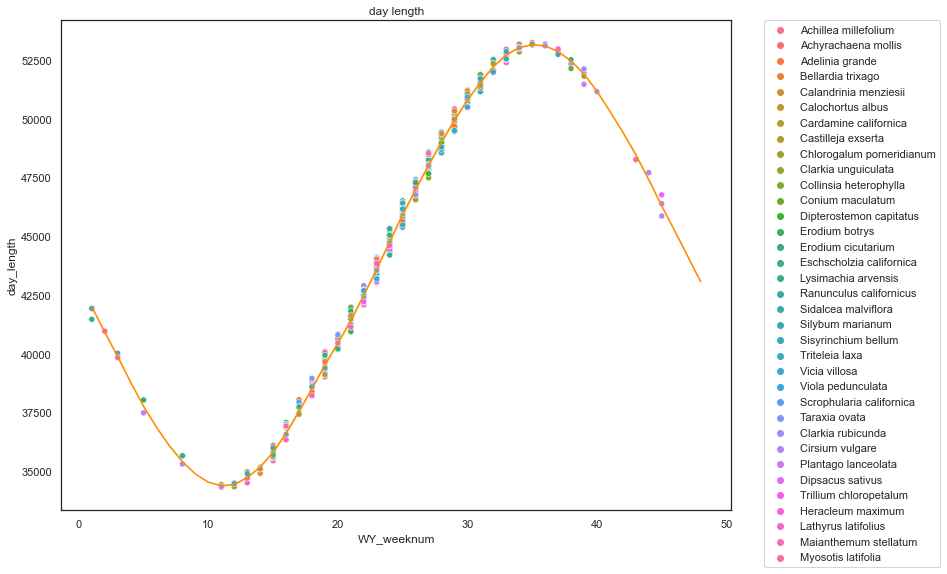

In [44]:
#day length on day of observation
plt.figure(figsize = (12,9))
sns.scatterplot(data=firsts, x="WY_weeknum", y="day_length", hue='genus_species').set(
    title="day length")
sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['day_length']),
                 color='darkorange')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show

<br>[Link to top](#top) <a id='single_species'></a>
# 11. Single species frequency by wateryear week

### 11a. import data

In [45]:
print(df.shape)
#print(df.columns)
df.head(3)

(5925, 37)


,Unnamed: 0,id,park,plain_dates,Year,Month,Day,WY,wy_month,WY_weeknum,...,MinTemp_prior14,AvgMaxTemp_prior14,AvgMinTemp_prior14,MaxDayLen_prior14,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30,status
0,3,104690215,Sunol,20220108,2022,1,8,2022,4,13,...,29.12,55.297143,40.903571,34980.0,63.05,29.12,55.256,40.199,34980.0,1
1,4,104681782,Sunol,20220109,2022,1,9,2022,4,14,...,29.12,55.727857,40.865000,35043.0,63.05,29.12,55.274,40.181,35043.0,1
2,7,104737736,Sunol,20220110,2022,1,10,2022,4,14,...,29.12,56.544286,40.762143,35108.0,63.50,29.12,55.391,40.493,35108.0,0


**get 20 most common species from phenology dataset, df**

In [46]:
#number of observations by species
spp_counts = df.groupby(['genus_species'])['genus_species'].count().sort_values(ascending=False).reset_index(name='count')
#print(spp_counts.head(32))

#get list of top n names
spp_top_20 = spp_counts['genus_species'].iloc[:20]
#print(list(spp_top_20))


**import precipitation data with all dates in range of study**
<br>using only the data linked to dates of flower observations will result in uneven subsampling of climate data

In [47]:
# import from GitHub:Floydworks
url = ('https://raw.githubusercontent.com/Floydworks/WildflowerFinder_Phenology_Tool/main/cleaned_data_files/climate_daylength_2017_2022.csv')
download = requests.get(url).content

# Read the downloaded content and turn it into a pandas dataframe
climate_daylength = pd.read_csv(io.StringIO(download.decode('utf-8')))

# assign new name for manipulation, start at beginning of 2017 water year
df_clim = climate_daylength[climate_daylength['plain_dates']>=20171001]

#add leading zeros to single digit week numbers
df_clim['WYwk_yr'] = pd.to_numeric(df_clim['WY'].astype(str)+df_clim['WY_weeknum'].astype(str).str.zfill(2))
df_clim['WYwk_yr_str'] = df_clim['WYwk_yr'].astype(str)
df_clim['WY_weeknum_str'] = df_clim['WY_weeknum'].astype(str)
#df_clim.info()

print(df_clim.shape)
print(df_clim.columns)
#pd.set_option('max_columns', None)
df_clim.head()

(14598, 57)
Index(['Unnamed: 0', 'city', 'station_id', 'park', 'plain_dates', 'Year',
       'Month', 'Day', 'WY', 'wy_month', 'WY_weeknum', 'prec_daily',
       'prec_cum_WY', 'MonSumPrec', 'MonCumPrec', 'WkSumPrec', 'WkCumPrec',
       'minTemp', 'maxTemp', 'MonMaxTemp', 'MonMinTemp', 'MonAvgMaxTemp',
       'MonAvgMinTemp', 'WkMaxTemp', 'WkMinTemp', 'WkAvgMaxTemp',
       'WkAvgMinTemp', 'hour_rise', 'minute_rise', 'hour_set', 'minute_set',
       'day_length', 'MonMaxDayLen', 'MonMinDayLen', 'MonAvgDayLen',
       'WkMaxDayLen', 'WkMinDayLen', 'WkAvgDayLen', 'sum_prec_prior14',
       'MaxTemp_prior14', 'MinTemp_prior14', 'AvgMaxTemp_prior14',
       'AvgMinTemp_prior14', 'MaxDayLen_prior14', 'MinDayLen_prior14',
       'AvgDayLen_prior14', 'sum_prec_prior30', 'MaxTemp_prior30',
       'MinTemp_prior30', 'AvgMaxTemp_prior30', 'AvgMinTemp_prior30',
       'MaxDayLen_prior30', 'MinDayLen_prior30', 'AvgDayLen_prior30',
       'WYwk_yr', 'WYwk_yr_str', 'WY_weeknum_str'],
      dtype='o

/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_38177/834984391.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clim['WYwk_yr'] = pd.to_numeric(df_clim['WY'].astype(str)+df_clim['WY_weeknum'].astype(str).str.zfill(2))
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_38177/834984391.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clim['WYwk_yr_str'] = df_clim['WYwk_yr'].astype(str)
/var/folders/bv/4mctz8d94zx0nlh0hjsm4x8h0000gn/T/ipykernel_38177/834984391.py:14: SettingWi

,Unnamed: 0,city,station_id,park,plain_dates,Year,Month,Day,WY,wy_month,...,MaxTemp_prior30,MinTemp_prior30,AvgMaxTemp_prior30,AvgMinTemp_prior30,MaxDayLen_prior30,MinDayLen_prior30,AvgDayLen_prior30,WYwk_yr,WYwk_yr_str,WY_weeknum_str
30,1929,concord,USW00023254,Briones,20171001,2017,10,1,2018,1,...,109.94,50.0,86.414,60.674,46664.0,42478.0,44581.866667,201801,201801,1
31,1993,concord,USW00023254,Briones,20171002,2017,10,2,2018,1,...,105.98,50.0,85.514,60.074,46523.0,42332.0,44437.466667,201801,201801,1
32,2057,concord,USW00023254,Briones,20171003,2017,10,3,2018,1,...,100.94,50.0,84.614,59.240,46381.0,42187.0,44292.933333,201801,201801,1
33,2121,concord,USW00023254,Briones,20171004,2017,10,4,2018,1,...,100.94,50.0,84.416,58.604,46240.0,42042.0,44148.300000,201801,201801,1
34,2185,concord,USW00023254,Briones,20171005,2017,10,5,2018,1,...,100.94,50.0,84.284,57.938,46098.0,41897.0,44003.533333,201801,201801,1


<a id='by_week'></a>
### 11b. single species observed frequency by wateryear-week

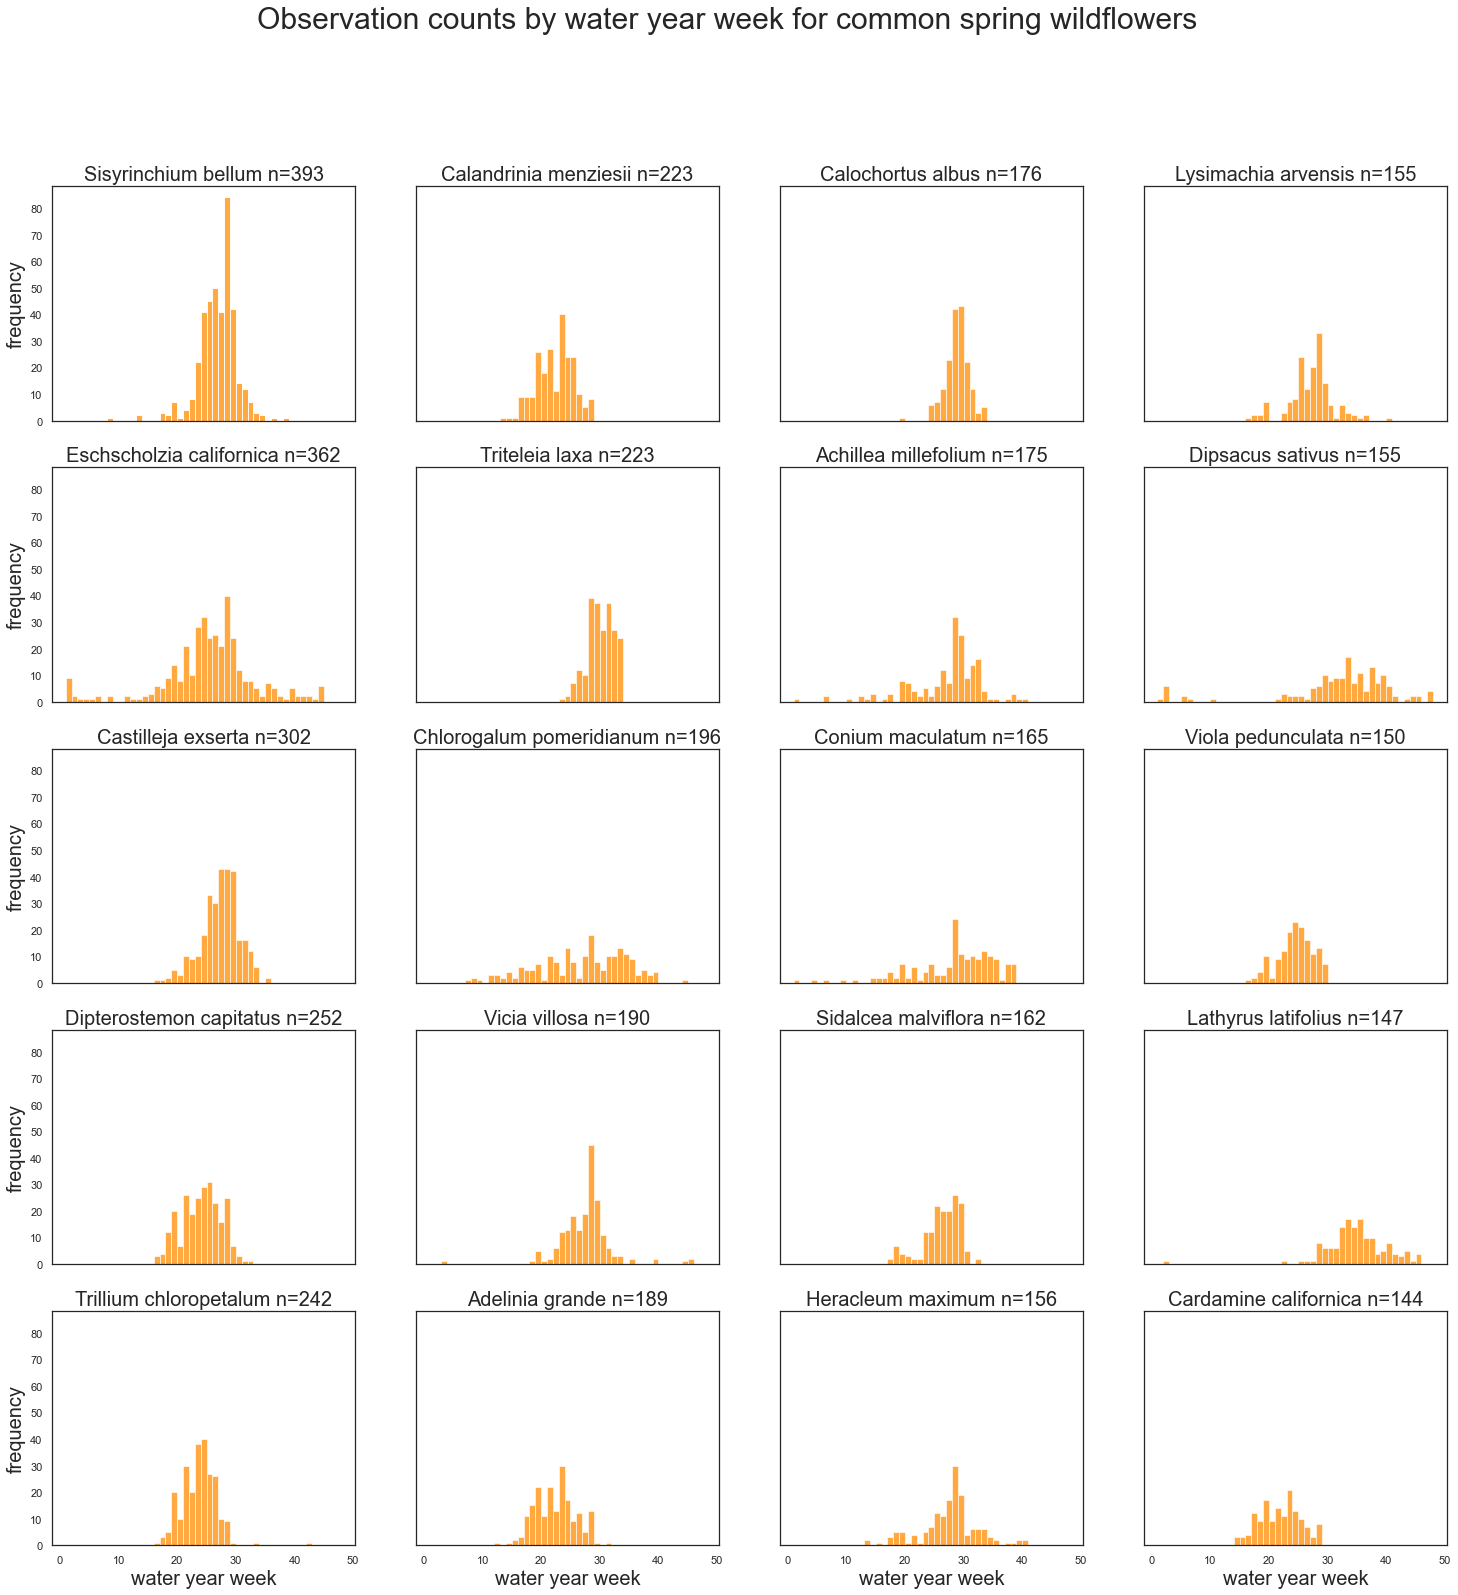

In [48]:
ax0 = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,]
ax1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
tups = list(zip(ax0 ,ax1))

fig, axes = plt.subplots(5, 4, figsize=(25, 25), sharex=True, sharey=True)
fig.suptitle('Observation counts by water year week for common spring wildflowers', fontsize=30)

for sp, ax in zip(spp_top_20, tups):
    sns.histplot(df[df['genus_species']==sp].sort_values(by = 'WY_weeknum', ascending = True), 
                 x="WY_weeknum", ax=axes[ax], bins = 48, binwidth=1, color='darkorange'), 
    axes[ax].set_title(sp+' n='+str(len(df[df['genus_species']==sp])), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)

<a id='climate_frequency'></a>
### 11c. climate and frequency of observed blooms

**temperature**

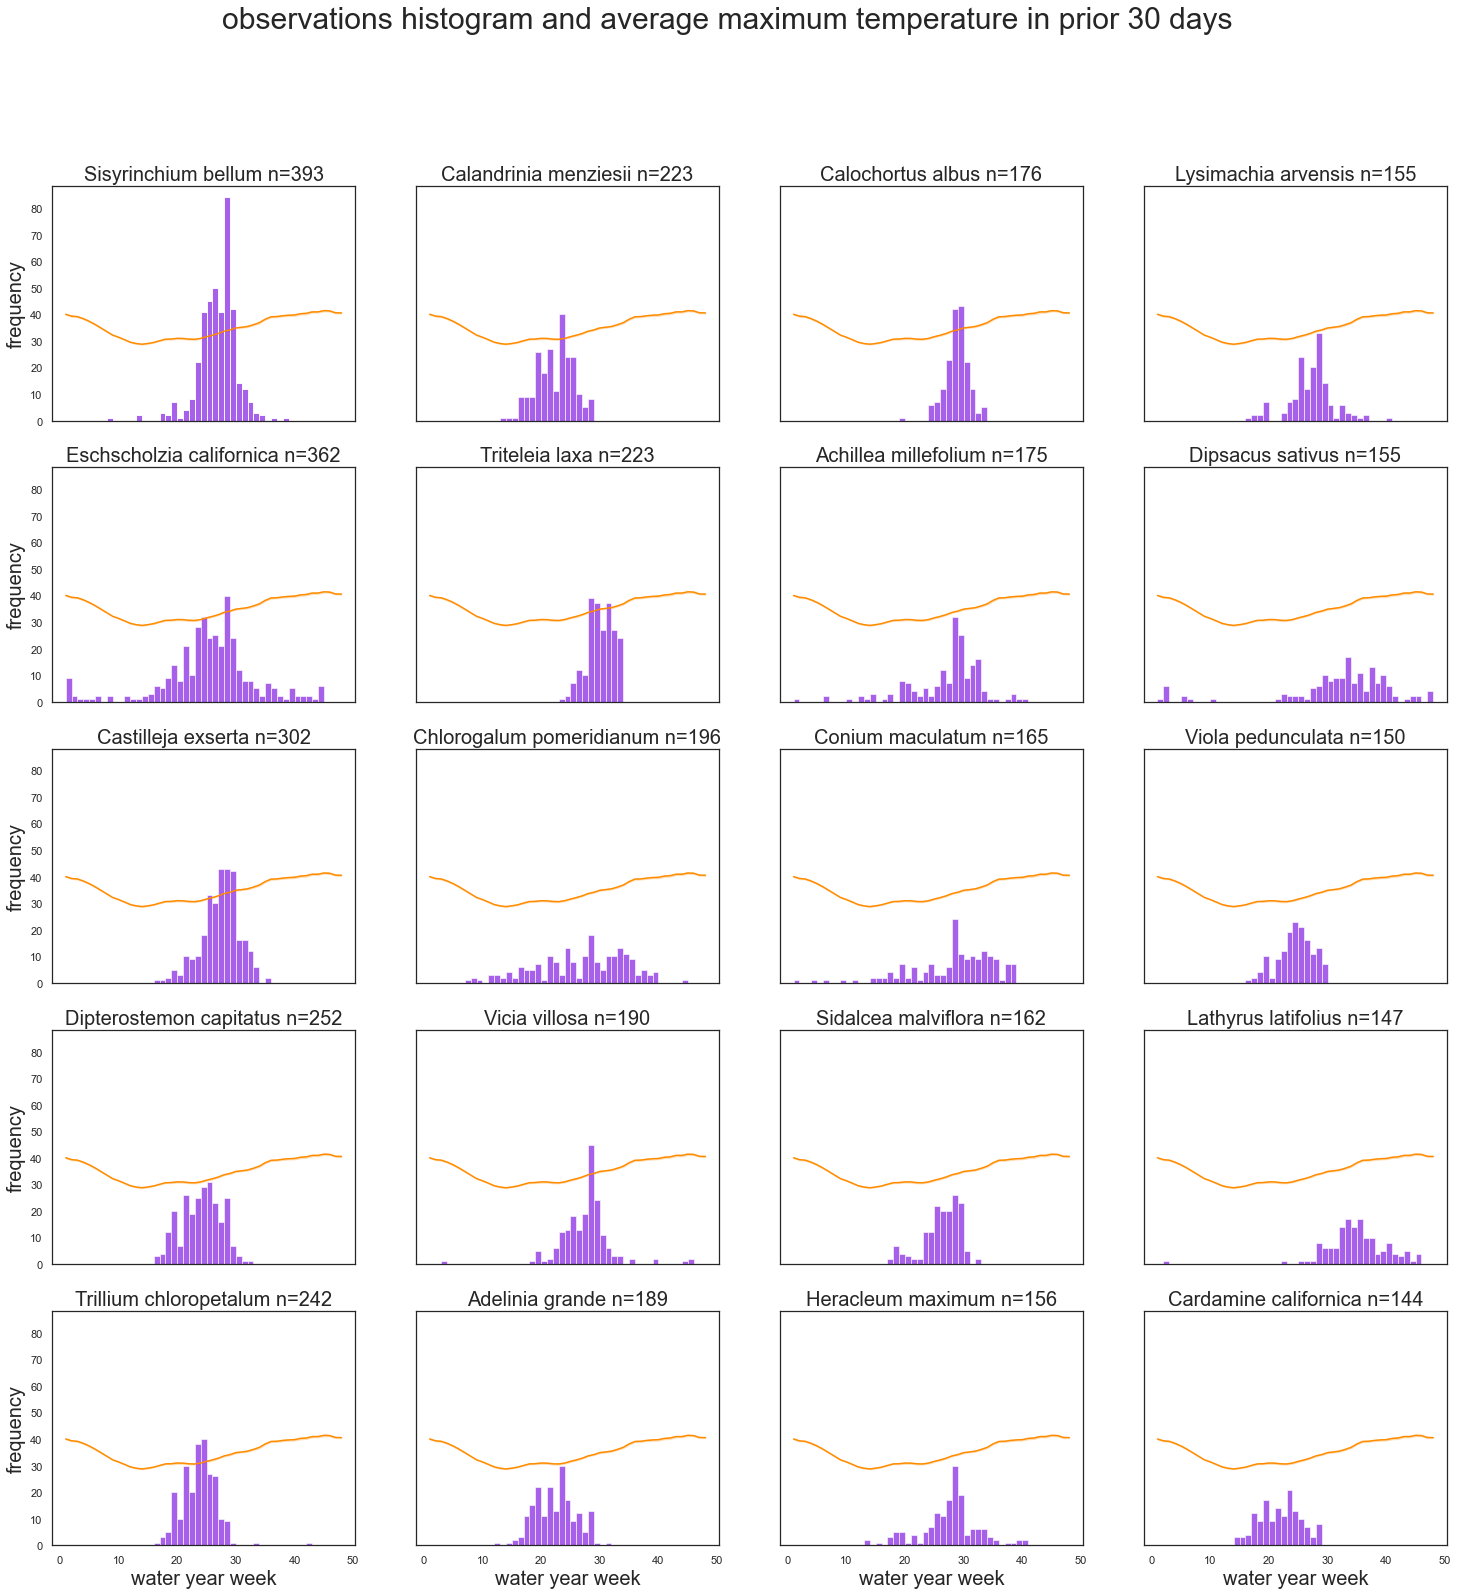

In [49]:
ax0 = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,]
ax1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
tups = list(zip(ax0 ,ax1))

fig, axes = plt.subplots(5, 4, figsize=(25, 25), sharex=True, sharey=True)
fig.suptitle('observations histogram and average maximum temperature in prior 30 days', fontsize=30)

for sp, ax in zip(spp_top_20, tups):
    sns.histplot(data=(df[df['genus_species']==sp]).sort_values(by = 'WY_weeknum', ascending = True), x="WY_weeknum", 
             ax=axes[ax], bins=48, binwidth=1, color='blueviolet')
    axes[ax].set_title(str(sp)+' n='+str(len(df[df['genus_species']==sp])), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)
    sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['AvgMaxTemp_prior30']/2),
                 ax=axes[ax], color='darkorange')

**precipitation**

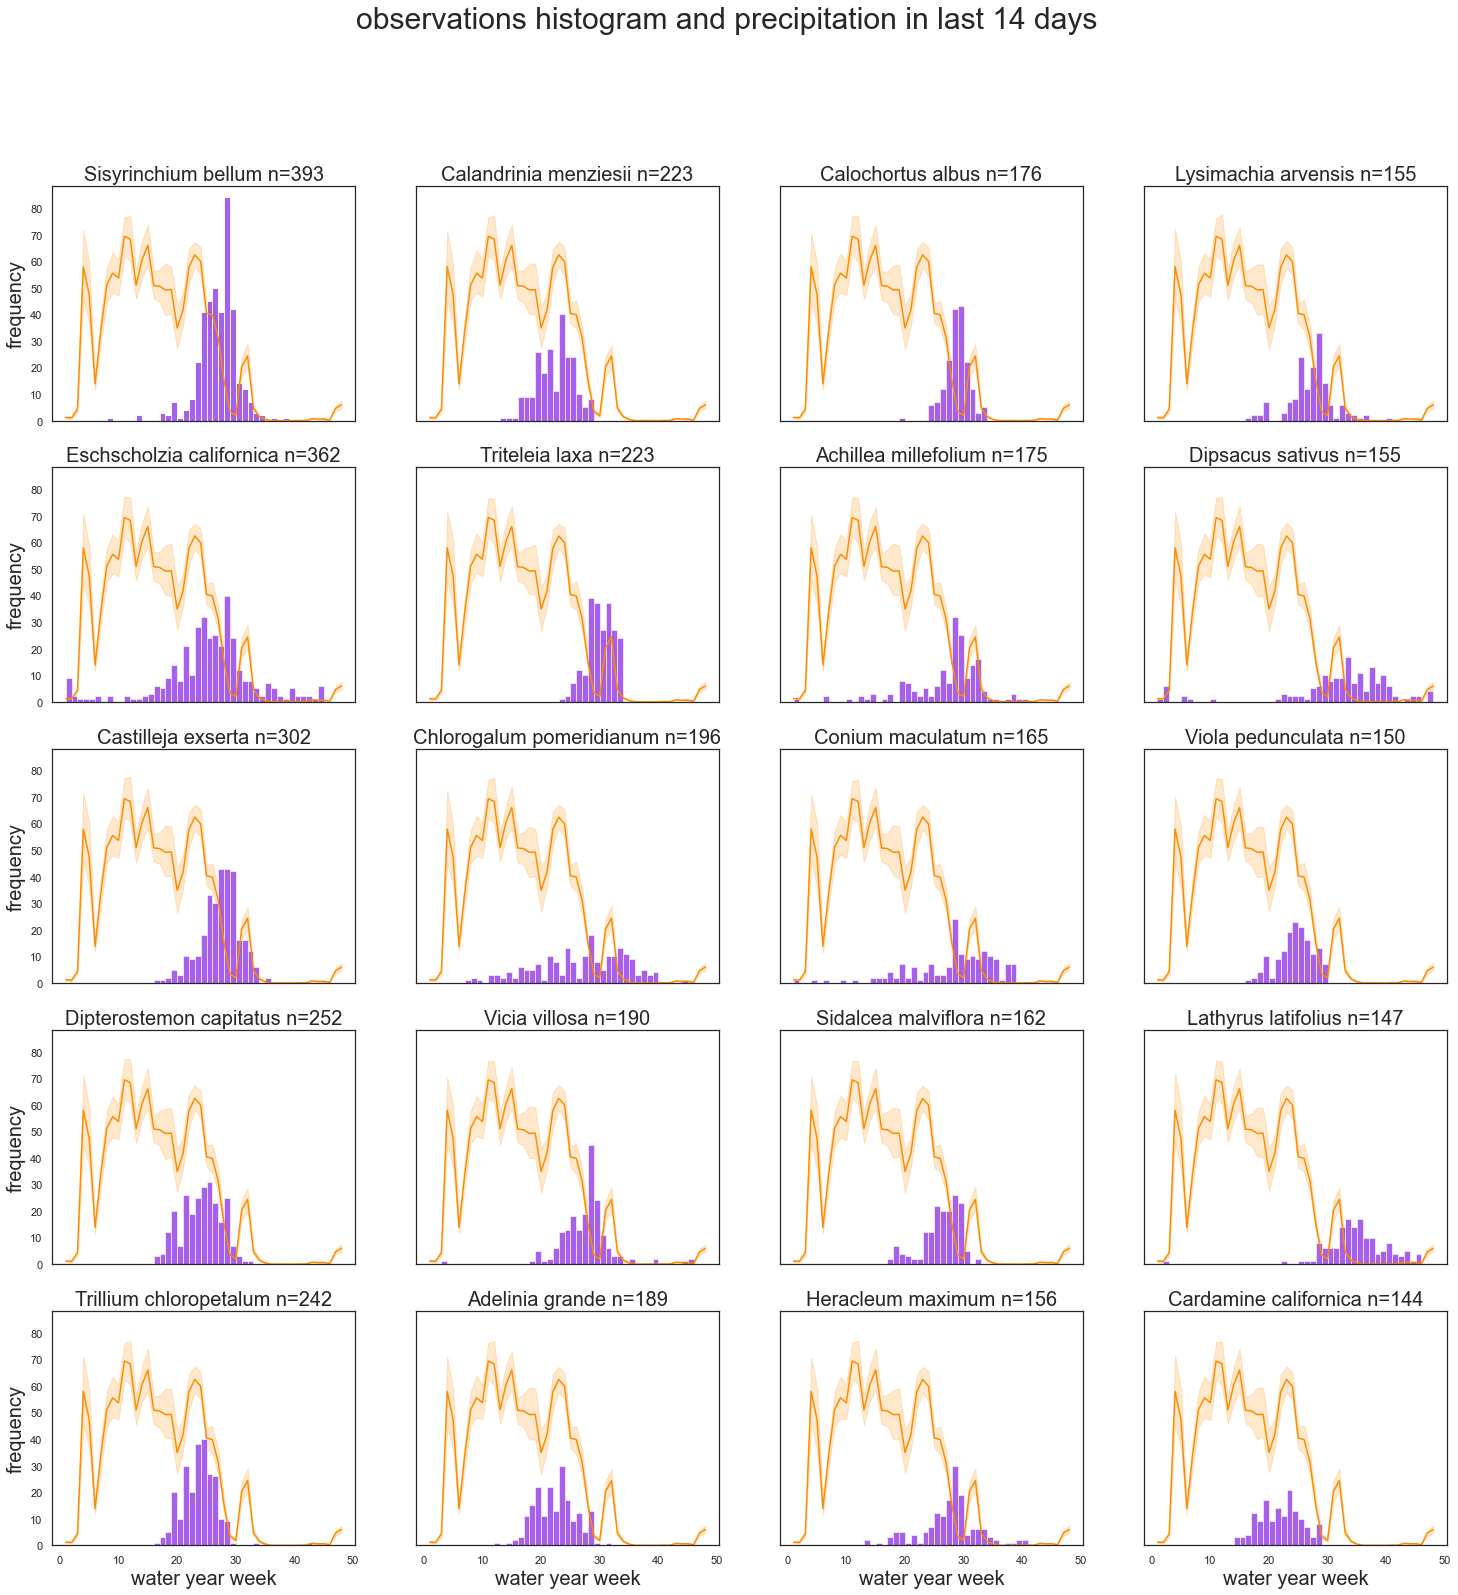

In [50]:
ax0 = [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,]
ax1 = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
tups = list(zip(ax0 ,ax1))

fig, axes = plt.subplots(5, 4, figsize=(25, 25), sharex=True, sharey=True)
fig.suptitle('observations histogram and precipitation in last 14 days', fontsize=30)

for sp, ax in zip(spp_top_20, tups):
    sns.histplot(data=(df[df['genus_species']==sp]).sort_values(by = 'WY_weeknum', ascending = True), x="WY_weeknum", 
             ax=axes[ax], bins=48, binwidth=1, color='blueviolet')
    axes[ax].set_title(str(sp)+' n='+str(len(df[df['genus_species']==sp])), fontsize=20)
    axes[ax].set_xlabel("water year week", fontsize = 20)
    axes[ax].set_ylabel("frequency", fontsize = 20)
    sns.lineplot(data=climate_daylength, x='WY_weeknum', y=(climate_daylength['sum_prec_prior14']*50),
                 ax=axes[ax], color='darkorange')

<br>[Link to top](#top) 